In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import TOFPET_cal_lib as TPcal
from scipy import interpolate
import time
import build_data_df_mine as bd
from functools import partial
import multiprocessing as mp

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [2]:
run = 11272
asic = 0
path_data = "/analysis/" + str(run) + "/hdf5/proc/linear_interp/files/"
#path_data = "/home/vherrero/CALIBRATION_FILES/"

In [3]:
def event_selection(df,column):
    max_pos = df[column].argmax()
    res1 = df.iloc[max_pos]['sensor_id'] in [44,45,54,55]
    
    event_size = len(df)
    if (event_size < 12):
        res2 = True
    else:
        res2 = False
    
#    res1 = True
#    res2 = True
    
    return res1  & res2

In [4]:
def process_energy(run_number,file_number):
    
    hi_intg_w = 80
    lo_intg_w = 25
    
    energy_efine_array = []
    energy_window_array = []
    file_data = path_data + 'run_' + str(run_number) +\
                    '_'+ str(file_number).zfill(4) + '_trigger1_waveforms.h5'

    with pd.HDFStore(file_data,'r',complib="zlib",complevel=4) as storage:
        keys = storage.keys()
        for j in keys:
            print("File %i | Chunk %s" % (file_number,j))
            data = pd.read_hdf(file_data,j) #,stop=1000)

            # Apply Filtering
            data_f = data[(data['intg_w']<hi_intg_w)&(data['intg_w']>lo_intg_w) & (data['cluster']!=-1) ]

            # Coincidence Filter
            coincidence   = data_f.groupby(['cluster','evt_number'])['tofpet_id'].nunique()
            data_f_idx    = data_f.set_index(['cluster','evt_number'])
            data_f        = data_f_idx.loc[coincidence[coincidence == 2].index]
                        
            data_f0 = data_f[(data_f['tofpet_id']==0)]
            
            # Event selection based on Maximum Charge
            sel = data_f0.groupby(['cluster','evt_number']).apply(event_selection,column='efine_corrected')
            data_f0 = data_f0[sel]
            
            # Energy computation (stored in a new column)    
            energy_efine  = data_f0.groupby(['cluster','evt_number'], as_index = False)['efine_corrected'].sum()#.rename('e_sum')
            #data_f        = data_f.join(energy_efine,  on=['cluster','evt_number'])
            
            energy_window = data_f0.groupby(['cluster','evt_number'], as_index = False)['intg_w'].sum()#.rename('w_sum')
            #data_f        = data_f.join(energy_window, on=['cluster','evt_number'])
            
                        
            #data_f0 = data_f[data_f['tofpet_id']==0]
            
            #energy_efine_aux  = pd.DataFrame(data_f0.groupby(['cluster','evt_number'])['e_sum'].first()).reset_index()
            #energy_window_aux = pd.DataFrame(data_f0.groupby(['cluster','evt_number'])['w_sum'].first()).reset_index()
            
            
            #print(energy_efine_aux)
            
            #energy_efine_array  = energy_efine_aux['e_sum'].to_numpy()
            #energy_window_array = energy_window_aux['w_sum'].to_numpy()
            
            energy_efine_array  = energy_efine['efine_corrected'].to_numpy()
            energy_window_array = energy_window['intg_w'].to_numpy()
            
            
        
    return energy_efine_array, energy_window_array

In [5]:
n_files = 90

energy_efine_array = []
energy_window_array = []
process_energy_mp = partial(process_energy,run) 

pool = mp.Pool(processes = n_files)

pool_output = pool.map(process_energy_mp, range(n_files))

pool.close()
pool.join()

sizes = np.shape(pool_output)

for x in range(sizes[0]):
    energy_window_array.extend(pool_output[x][1])
    energy_efine_array.extend(pool_output[x][0])
    
        
energy_window_array1 = np.array(energy_window_array)
energy_efine_array1= np.array(energy_efine_array)



File 88 | Chunk /data_0
File 87 | Chunk /data_0
File 61 | Chunk /data_0
File 48 | Chunk /data_0
File 65 | Chunk /data_0
File 56 | Chunk /data_0
File 84 | Chunk /data_0
File 75 | Chunk /data_0
File 66 | Chunk /data_0
File 81 | Chunk /data_0
File 77 | Chunk /data_0
File 72 | Chunk /data_0
File 79 | Chunk /data_0
File 44 | Chunk /data_0
File 51 | Chunk /data_0
File 86 | Chunk /data_0
File 58 | Chunk /data_0File 71 | Chunk /data_0

File 2 | Chunk /data_0
File 80 | Chunk /data_0
File 62 | Chunk /data_0
File 74 | Chunk /data_0
File 64 | Chunk /data_0
File 78 | Chunk /data_0
File 57 | Chunk /data_0
File 17 | Chunk /data_0
File 27 | Chunk /data_0
File 83 | Chunk /data_0
File 38 | Chunk /data_0
File 40 | Chunk /data_0
File 22 | Chunk /data_0
File 60 | Chunk /data_0
File 47 | Chunk /data_0
File 24 | Chunk /data_0
File 46 | Chunk /data_0
File 85 | Chunk /data_0
File 89 | Chunk /data_0
File 76 | Chunk /data_0
File 15 | Chunk /data_0
File 63 | Chunk /data_0
File 3 | Chunk /data_0
File 12 | Chunk /d

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_1
File 69 | Chunk /data_0


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_1
File 75 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_1
File 51 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_1
File 84 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_1
File 17 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_1
File 87 | Chunk /data_1
File 78 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_1
File 38 | Chunk /data_1
File 74 | Chunk /data_1

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_1File 64 | Chunk /data_1



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_1
File 2 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_1
File 22 | Chunk /data_1
File 66 | Chunk /data_1
File 16 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_1
File 45 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_1
File 46 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_1
File 39 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_1File 12 | Chunk /data_1

File 24 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_1
File 63 | Chunk /data_1
File 52 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_1File 28 | Chunk /data_1
File 7 | Chunk /data_1

File 21 | Chunk /data_1File 67 | Chunk /data_1



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_1
File 49 | Chunk /data_1
File 85 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_1
File 76 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_1
File 6 | Chunk /data_1
File 5 | Chunk /data_1File 30 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 70 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_1
File 1 | Chunk /data_1File 23 | Chunk /data_1File 42 | Chunk /data_1


File 31 | Chunk /data_1
File 3 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_1
File 41 | Chunk /data_1
File 68 | Chunk /data_1

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 60 | Chunk /data_1
File 19 | Chunk /data_1
File 32 | Chunk /data_1File 53 | Chunk /data_1

File 82 | Chunk /data_1

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_1File 18 | Chunk /data_1

File 34 | Chunk /data_1
File 33 | Chunk /data_1
File 14 | Chunk /data_1
File 55 | Chunk /data_1
File 20 | Chunk /data_1
File 54 | Chunk /data_1

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 50 | Chunk /data_1
File 88 | Chunk /data_10
File 10 | Chunk /data_1
File 13 | Chunk /data_1
File 69 | Chunk /data_1
File 36 | Chunk /data_1


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_10
File 62 | Chunk /data_10
File 51 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_10
File 44 | Chunk /data_10
File 17 | Chunk /data_10
File 57 | Chunk /data_10
File 79 | Chunk /data_10
File 48 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_10
File 22 | Chunk /data_10
File 58 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_10
File 72 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_10
File 61 | Chunk /data_10
File 26 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_10
File 74 | Chunk /data_10
File 40 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_10
File 77 | Chunk /data_10
File 2 | Chunk /data_10
File 45 | Chunk /data_10
File 66 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_10
File 86 | Chunk /data_10
File 43 | Chunk /data_10
File 39 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_10
File 67 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_10
File 11 | Chunk /data_10File 71 | Chunk /data_10

File 52 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_10
File 49 | Chunk /data_10File 21 | Chunk /data_10



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_10
File 63 | Chunk /data_10File 85 | Chunk /data_10



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_10
File 53 | Chunk /data_10
File 29 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_10
File 10 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 73 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_10

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_10
File 22 | Chunk /data_11File 37 | Chunk /data_10

File 34 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_10
File 51 | Chunk /data_100File 18 | Chunk /data_10

File 76 | Chunk /data_10
File 32 | Chunk /data_10
File 42 | Chunk /data_10
File 68 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_11
File 23 | Chunk /data_10
File 8 | Chunk /data_10
File 1 | Chunk /data_10
File 62 | Chunk /data_100
File 6 | Chunk /data_10
File 35 | Chunk /data_10
File 69 | Chunk /data_10
File 0 | Chunk /data_10
File 54 | Chunk /data_10File 55 | Chunk /data_10

File 31 | Chunk /data_10
File 65 | Chunk /data_100
File 56 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_10

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_10
File 89 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_10


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_10
File 75 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_100
File 79 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_100
File 3 | Chunk /data_10
File 57 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_100
File 44 | Chunk /data_100
File 84 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_11
File 27 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_100
File 59 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_100
File 43 | Chunk /data_100
File 64 | Chunk /data_100
File 2 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_100
File 15 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_11
File 39 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_100
File 7 | Chunk /data_11
File 47 | Chunk /data_100
File 46 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_100
File 49 | Chunk /data_100
File 11 | Chunk /data_11
File 28 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_100

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_11
File 29 | Chunk /data_11File 25 | Chunk /data_11



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_11
File 85 | Chunk /data_100
File 53 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_11
File 63 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_100
File 37 | Chunk /data_11
File 10 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_11
File 19 | Chunk /data_11
File 13 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_12
File 73 | Chunk /data_100
File 18 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_11
File 34 | Chunk /data_11
File 88 | Chunk /data_12
File 56 | Chunk /data_101
File 62 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_100
File 54 | Chunk /data_100
File 48 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 76 | Chunk /data_100
File 69 | Chunk /data_100
File 35 | Chunk /data_11

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_100
File 25 | Chunk /data_12File 8 | Chunk /data_11



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_100File 20 | Chunk /data_11

File 50 | Chunk /data_100
File 23 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_11
File 65 | Chunk /data_101
File 14 | Chunk /data_11
File 49 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_101
File 58 | Chunk /data_101
File 84 | Chunk /data_101
File 17 | Chunk /data_12
File 81 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_12
File 83 | Chunk /data_101File 64 | Chunk /data_101



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_12
File 70 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_12
File 53 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_12File 52 | Chunk /data_101



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_100


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_11
File 44 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_12File 60 | Chunk /data_101

File 10 | Chunk /data_12
File 74 | Chunk /data_101
File 72 | Chunk /data_101File 57 | Chunk /data_101

File 21 | Chunk /data_12
File 3 | Chunk /data_11
File 5 | Chunk /data_12

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_101
File 61 | Chunk /data_101
File 85 | Chunk /data_101
File 46 | Chunk /data_101

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_12

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 22 | Chunk /data_13

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 33 | Chunk /data_11
File 4 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_101File 24 | Chunk /data_12

File 38 | Chunk /data_12
File 47 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_12
File 56 | Chunk /data_102
File 88 | Chunk /data_13
File 77 | Chunk /data_101
File 40 | Chunk /data_101File 39 | Chunk /data_12

File 2 | Chunk /data_12
File 15 | Chunk /data_12
File 71 | Chunk /data_101
File 78 | Chunk /data_101File 73 | Chunk /data_101

File 13 | Chunk /data_12File 80 | Chunk /data_101

File 63 | Chunk /data_101
File 62 | Chunk /data_102
File 66 | Chunk /data_101
File 29 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_101
File 42 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_101
File 48 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_12
File 35 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_13
File 81 | Chunk /data_102
File 31 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_102File 59 | Chunk /data_102

File 23 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_102
File 65 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_101File 8 | Chunk /data_12



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_101
File 6 | Chunk /data_12
File 76 | Chunk /data_101
File 55 | Chunk /data_101
File 20 | Chunk /data_12File 49 | Chunk /data_102



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_12
File 26 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_102
File 34 | Chunk /data_13
File 75 | Chunk /data_13
File 87 | Chunk /data_102
File 36 | Chunk /data_13

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 27 | Chunk /data_13
File 64 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_102
File 70 | Chunk /data_101
File 28 | Chunk /data_13
File 19 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_13
File 44 | Chunk /data_102
File 9 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_101


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_13
File 10 | Chunk /data_13
File 60 | Chunk /data_102
File 0 | Chunk /data_12
File 4 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 42 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_102
File 21 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_103
File 12 | Chunk /data_13File 61 | Chunk /data_102

File 57 | Chunk /data_102
File 30 | Chunk /data_13
File 5 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_13
File 63 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_13
File 72 | Chunk /data_102
File 68 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_102
File 22 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_13
File 3 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_13
File 76 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_14File 86 | Chunk /data_102

File 78 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_14File 47 | Chunk /data_102



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_102
File 13 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_103
File 33 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_102
File 1 | Chunk /data_13
File 81 | Chunk /data_103
File 40 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_13
File 80 | Chunk /data_102File 58 | Chunk /data_103
File 77 | Chunk /data_102



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_14File 2 | Chunk /data_13

File 69 | Chunk /data_102
File 50 | Chunk /data_102
File 56 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_102
File 51 | Chunk /data_103
File 84 | Chunk /data_103
File 59 | Chunk /data_103
File 14 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_102
File 20 | Chunk /data_13
File 55 | Chunk /data_102
File 31 | Chunk /data_13

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 62 | Chunk /data_103
File 23 | Chunk /data_13
File 49 | Chunk /data_103
File 6 | Chunk /data_13
File 8 | Chunk /data_13

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 82 | Chunk /data_102File 26 | Chunk /data_14



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_103
File 83 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_14File 64 | Chunk /data_103

File 36 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_103
File 27 | Chunk /data_14
File 87 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_102
File 16 | Chunk /data_14
File 53 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_14
File 52 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_14
File 60 | Chunk /data_103
File 73 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_13
File 89 | Chunk /data_102


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_14
File 4 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_103
File 30 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_103
File 12 | Chunk /data_14

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_104
File 5 | Chunk /data_14
File 61 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_103
File 76 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_103

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_14File 41 | Chunk /data_103



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_14
File 3 | Chunk /data_13
File 14 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_15
File 37 | Chunk /data_15

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_14
File 38 | Chunk /data_14
File 62 | Chunk /data_104
File 78 | Chunk /data_103
File 56 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_103
File 81 | Chunk /data_104File 75 | Chunk /data_15



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_13
File 80 | Chunk /data_103File 1 | Chunk /data_14



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_104

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_103File 83 | Chunk /data_104



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_14
File 40 | Chunk /data_103
File 32 | Chunk /data_14
File 51 | Chunk /data_104

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 20 | Chunk /data_14
File 8 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_104
File 34 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_15
File 70 | Chunk /data_103

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_104
File 36 | Chunk /data_15
File 24 | Chunk /data_14
File 88 | Chunk /data_15
File 50 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_104File 87 | Chunk /data_104



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_15
File 66 | Chunk /data_103
File 31 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_104
File 23 | Chunk /data_14File 65 | Chunk /data_104

File 43 | Chunk /data_104

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 17 | Chunk /data_15
File 82 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_14
File 71 | Chunk /data_103
File 9 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_104
File 16 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_104
File 19 | Chunk /data_15
File 68 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_14
File 89 | Chunk /data_103


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_15
File 61 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_15
File 48 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_15
File 57 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_104File 76 | Chunk /data_104

File 55 | Chunk /data_104
File 11 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_104
File 45 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_14
File 41 | Chunk /data_104
File 29 | Chunk /data_15
File 72 | Chunk /data_104
File 67 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_15

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_104
File 37 | Chunk /data_16
File 81 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_105
File 54 | Chunk /data_104
File 38 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_105
File 75 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_15
File 36 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_105
File 59 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_15
File 69 | Chunk /data_104
File 64 | Chunk /data_105
File 34 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_16
File 27 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_16
File 9 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_104
File 80 | Chunk /data_104
File 33 | Chunk /data_14
File 24 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_105
File 87 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_16
File 10 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_16
File 58 | Chunk /data_105
File 48 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_15
File 1 | Chunk /data_15
File 86 | Chunk /data_104
File 30 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_15

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_105

File 76 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_105
File 12 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_104
File 55 | Chunk /data_105
File 44 | Chunk /data_105

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_16
File 46 | Chunk /data_105
File 43 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_105
File 15 | Chunk /data_16File 11 | Chunk /data_16



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_105
File 4 | Chunk /data_16
File 68 | Chunk /data_105
File 73 | Chunk /data_105
File 60 | Chunk /data_105

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_16
File 65 | Chunk /data_105
File 61 | Chunk /data_105
File 57 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_105
File 89 | Chunk /data_104


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_105
File 2 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_104
File 0 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_105
File 7 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_17
File 63 | Chunk /data_105
File 85 | Chunk /data_105
File 32 | Chunk /data_15
File 72 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_105
File 3 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_16

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 14 | Chunk /data_16
File 25 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_17
File 38 | Chunk /data_16
File 54 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_106
File 81 | Chunk /data_106
File 75 | Chunk /data_17
File 62 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_106

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_16
File 59 | Chunk /data_106

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_105
File 18 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_17
File 51 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_106
File 70 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_17
File 9 | Chunk /data_17
File 10 | Chunk /data_17
File 19 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_105
File 34 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_105
File 87 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_105
File 30 | Chunk /data_17
File 21 | Chunk /data_17
File 35 | Chunk /data_17
File 6 | Chunk /data_16

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 58 | Chunk /data_106
File 33 | Chunk /data_15
File 66 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_17
File 67 | Chunk /data_107
File 55 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_106
File 26 | Chunk /data_17
File 1 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_17
File 20 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_106
File 29 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_16
File 60 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_106
File 32 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_18
File 63 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_106

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 68 | Chunk /data_11
File 50 | Chunk /data_105


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_18
File 0 | Chunk /data_16
File 43 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_17
File 76 | Chunk /data_106
File 49 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_18
File 81 | Chunk /data_107
File 62 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_106
File 77 | Chunk /data_105
File 3 | Chunk /data_16

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_106
File 39 | Chunk /data_17
File 18 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_17
File 46 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_11
File 51 | Chunk /data_107

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_107
File 56 | Chunk /data_107
File 5 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_105
File 4 | Chunk /data_17File 7 | Chunk /data_17



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_18
File 74 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_17File 8 | Chunk /data_16



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_11
File 54 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_17
File 84 | Chunk /data_106File 10 | Chunk /data_18



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_106
File 47 | Chunk /data_106File 19 | Chunk /data_18

File 14 | Chunk /data_17
File 64 | Chunk /data_107

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 34 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_18File 61 | Chunk /data_106

File 9 | Chunk /data_18File 75 | Chunk /data_18

File 70 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_18
File 87 | Chunk /data_107
File 78 | Chunk /data_106
File 86 | Chunk /data_106
File 30 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_107
File 24 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_108
File 35 | Chunk /data_18
File 83 | Chunk /data_107
File 33 | Chunk /data_16
File 17 | Chunk /data_18
File 80 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_17
File 67 | Chunk /data_11
File 82 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_107
File 66 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_17
File 41 | Chunk /data_11
File 26 | Chunk /data_18
File 53 | Chunk /data_11
File 29 | Chunk /data_18
File 20 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_19
File 65 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_17
File 76 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_107
File 60 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_18
File 12 | Chunk /data_18
File 18 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_18
File 3 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_17
File 34 | Chunk /data_19
File 56 | Chunk /data_108
File 0 | Chunk /data_17
File 52 | Chunk /data_107
File 70 | Chunk /data_11
File 5 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_108
File 69 | Chunk /data_107
File 51 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 72 | Chunk /data_107
File 7 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_19
File 57 | Chunk /data_107

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 71 | Chunk /data_106
File 30 | Chunk /data_19
File 8 | Chunk /data_17
File 79 | Chunk /data_107
File 86 | Chunk /data_107File 58 | Chunk /data_108File 88 | Chunk /data_18


File 4 | Chunk /data_18
File 87 | Chunk /data_108
File 85 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_19

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 45 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_106


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_18
File 22 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_12
File 54 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_12

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_106File 63 | Chunk /data_107



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_19
File 25 | Chunk /data_19
File 15 | Chunk /data_19
File 78 | Chunk /data_107
File 48 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_19
File 67 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_107
File 23 | Chunk /data_18File 55 | Chunk /data_12



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_18
File 28 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_12

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 89 | Chunk /data_12
File 1 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_107

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_19
File 74 | Chunk /data_107
File 84 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_19
File 17 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_19
File 40 | Chunk /data_107
File 53 | Chunk /data_12
File 81 | Chunk /data_108
File 6 | Chunk /data_18
File 37 | Chunk /data_2
File 20 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_18
File 2 | Chunk /data_17
File 33 | Chunk /data_17
File 31 | Chunk /data_18
File 66 | Chunk /data_107
File 75 | Chunk /data_19
File 60 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_19
File 49 | Chunk /data_13
File 16 | Chunk /data_19
File 43 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_108
File 39 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_2

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 70 | Chunk /data_12
File 0 | Chunk /data_18File 32 | Chunk /data_18



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_109
File 27 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_2
File 69 | Chunk /data_108
File 64 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_108File 57 | Chunk /data_108



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_109File 79 | Chunk /data_108



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_109
File 86 | Chunk /data_108
File 88 | Chunk /data_19
File 30 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_2
File 8 | Chunk /data_18
File 36 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_107
File 24 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_107

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_108
File 29 | Chunk /data_2
File 85 | Chunk /data_11
File 22 | Chunk /data_2File 28 | Chunk /data_2

File 83 | Chunk /data_109
File 78 | Chunk /data_108
File 21 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_109
File 25 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_19
File 81 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_109
File 17 | Chunk /data_2
File 11 | Chunk /data_2
File 53 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_108
File 10 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_11
File 14 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_18
File 45 | Chunk /data_108
File 43 | Chunk /data_109

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_19
File 41 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_19
File 20 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_20File 47 | Chunk /data_108

File 5 | Chunk /data_2
File 16 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_2File 49 | Chunk /data_14

File 75 | Chunk /data_2
File 52 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_109File 68 | Chunk /data_13

File 84 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_18
File 18 | Chunk /data_20

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_13
File 74 | Chunk /data_108
File 77 | Chunk /data_107


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_108


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_13
File 65 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_13
File 39 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_109
File 0 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_20
File 3 | Chunk /data_19
File 59 | Chunk /data_11
File 70 | Chunk /data_13
File 57 | Chunk /data_109
File 38 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_11
File 27 | Chunk /data_20File 19 | Chunk /data_20



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_109
File 56 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_20
File 7 | Chunk /data_2
File 30 | Chunk /data_20
File 79 | Chunk /data_109File 58 | Chunk /data_11

File 4 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_11
File 8 | Chunk /data_19File 36 | Chunk /data_20



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_20
File 23 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_108
File 80 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_12File 22 | Chunk /data_20



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_2
File 48 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_11
File 15 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_109
File 82 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_11
File 81 | Chunk /data_12

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_20



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_20
File 10 | Chunk /data_21File 53 | Chunk /data_14

File 11 | Chunk /data_20
File 1 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_20
File 83 | Chunk /data_11
File 73 | Chunk /data_12File 31 | Chunk /data_2



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_15
File 32 | Chunk /data_2
File 65 | Chunk /data_11
File 41 | Chunk /data_14
File 67 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_11
File 17 | Chunk /data_20
File 34 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_11
File 18 | Chunk /data_21
File 52 | Chunk /data_11
File 70 | Chunk /data_14
File 3 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_20

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 59 | Chunk /data_110
File 76 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_20

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 27 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_110
File 61 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_110
File 6 | Chunk /data_2
File 79 | Chunk /data_11File 72 | Chunk /data_11



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_19
File 35 | Chunk /data_21
File 30 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_21
File 16 | Chunk /data_20
File 20 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_14
File 4 | Chunk /data_20
File 42 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_2
File 50 | Chunk /data_12
File 54 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_110
File 47 | Chunk /data_109
File 88 | Chunk /data_20
File 66 | Chunk /data_109
File 36 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_14
File 87 | Chunk /data_110


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_21
File 12 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_13

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 45 | Chunk /data_11
File 77 | Chunk /data_108
File 78 | Chunk /data_11
File 74 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_21
File 2 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_15

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_11
File 15 | Chunk /data_21
File 24 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_2
File 86 | Chunk /data_12
File 71 | Chunk /data_109
File 46 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_15
File 48 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_110
File 80 | Chunk /data_11
File 38 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_2
File 25 | Chunk /data_21
File 10 | Chunk /data_22
File 28 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_21File 81 | Chunk /data_13



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_21
File 62 | Chunk /data_110
File 1 | Chunk /data_20
File 31 | Chunk /data_20File 11 | Chunk /data_21

File 73 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_110


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_110
File 55 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_20
File 5 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_16
File 18 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_12
File 41 | Chunk /data_15
File 60 | Chunk /data_110


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_20
File 34 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_110
File 17 | Chunk /data_21
File 59 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_15
File 61 | Chunk /data_11
File 39 | Chunk /data_21
File 76 | Chunk /data_110
File 7 | Chunk /data_21
File 3 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_22
File 72 | Chunk /data_110
File 64 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_22
File 12 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_110


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_111

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_20
File 88 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_12File 16 | Chunk /data_21

File 66 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_2
File 40 | Chunk /data_12
File 85 | Chunk /data_14File 78 | Chunk /data_110



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_13

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_21
File 23 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_15
File 35 | Chunk /data_22

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 71 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_15
File 53 | Chunk /data_16
File 80 | Chunk /data_110


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_2

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_22
File 10 | Chunk /data_23

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 86 | Chunk /data_13
File 11 | Chunk /data_22
File 8 | Chunk /data_20
File 82 | Chunk /data_16
File 29 | Chunk /data_22
File 37 | Chunk /data_22
File 68 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_110
File 1 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_22
File 22 | Chunk /data_22
File 31 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_16

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_14
File 83 | Chunk /data_111
File 77 | Chunk /data_109


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_22
File 65 | Chunk /data_111
File 59 | Chunk /data_112
File 84 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_22
File 45 | Chunk /data_12
File 32 | Chunk /data_21
File 18 | Chunk /data_23
File 28 | Chunk /data_22

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 41 | Chunk /data_16
File 60 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_22
File 49 | Chunk /data_17
File 62 | Chunk /data_111
File 38 | Chunk /data_20
File 74 | Chunk /data_11

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 25 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_111
File 70 | Chunk /data_16
File 76 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_23
File 26 | Chunk /data_22
File 0 | Chunk /data_21

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_22
File 61 | Chunk /data_110


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_21
File 51 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_23
File 64 | Chunk /data_112
File 30 | Chunk /data_23
File 72 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_21

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_112

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_15
File 12 | Chunk /data_22
File 88 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_21
File 52 | Chunk /data_13
File 16 | Chunk /data_22
File 69 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_17
File 58 | Chunk /data_13File 66 | Chunk /data_110

File 78 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_14
File 33 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_23
File 89 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_13
File 80 | Chunk /data_111
File 2 | Chunk /data_20File 24 | Chunk /data_22

File 21 | Chunk /data_23
File 11 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_15
File 48 | Chunk /data_16

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 71 | Chunk /data_110
File 23 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_22
File 36 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_21
File 53 | Chunk /data_17
File 83 | Chunk /data_12
File 63 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_23
File 5 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_113


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_21
File 41 | Chunk /data_17
File 49 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_13

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 10 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_23File 42 | Chunk /data_16

File 1 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_23
File 13 | Chunk /data_22
File 73 | Chunk /data_15
File 62 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_14
File 25 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_15
File 43 | Chunk /data_112File 76 | Chunk /data_13

File 44 | Chunk /data_110
File 19 | Chunk /data_24
File 51 | Chunk /data_113


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_17

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_13
File 57 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_22
File 47 | Chunk /data_110
File 67 | Chunk /data_17
File 77 | Chunk /data_11


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_110


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_23
File 6 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_113
File 38 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_24
File 74 | Chunk /data_12
File 72 | Chunk /data_112
File 16 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_112File 12 | Chunk /data_23



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_113
File 4 | Chunk /data_23
File 88 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_14
File 69 | Chunk /data_14
File 15 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_18
File 54 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 58 | Chunk /data_14
File 66 | Chunk /data_111File 40 | Chunk /data_14



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_18
File 21 | Chunk /data_24
File 29 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_23
File 33 | Chunk /data_21
File 89 | Chunk /data_17
File 71 | Chunk /data_111
File 32 | Chunk /data_23File 48 | Chunk /data_17

File 11 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_14
File 83 | Chunk /data_13
File 31 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_12
File 5 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_24
File 41 | Chunk /data_18
File 10 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_114


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_23
File 86 | Chunk /data_15
File 26 | Chunk /data_24
File 34 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_22
File 13 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_24

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 0 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_25
File 67 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_18
File 65 | Chunk /data_113


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_113


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_113
File 62 | Chunk /data_113File 27 | Chunk /data_25

File 44 | Chunk /data_111
File 37 | Chunk /data_24
File 81 | Chunk /data_16
File 3 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_17
File 61 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_23
File 75 | Chunk /data_23
File 72 | Chunk /data_113


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_114
File 4 | Chunk /data_24
File 17 | Chunk /data_24
File 47 | Chunk /data_111

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_110


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 39 | Chunk /data_24
File 54 | Chunk /data_17File 28 | Chunk /data_24



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_14
File 18 | Chunk /data_25
File 30 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_15
File 56 | Chunk /data_114
File 88 | Chunk /data_24File 15 | Chunk /data_25

File 16 | Chunk /data_24
File 79 | Chunk /data_113


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_15
File 6 | Chunk /data_23
File 74 | Chunk /data_13

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_24
File 58 | Chunk /data_15
File 82 | Chunk /data_19File 71 | Chunk /data_112
File 53 | Chunk /data_19

File 69 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_112


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_24
File 78 | Chunk /data_113


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_16
File 89 | Chunk /data_18
File 29 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_22
File 33 | Chunk /data_22
File 24 | Chunk /data_24
File 80 | Chunk /data_113
File 40 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_25File 8 | Chunk /data_23

File 48 | Chunk /data_18File 32 | Chunk /data_24

File 35 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_19
File 59 | Chunk /data_13
File 31 | Chunk /data_24
File 5 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_115


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_26
File 36 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_25
File 14 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_25File 0 | Chunk /data_24

File 73 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_26
File 46 | Chunk /data_12
File 1 | Chunk /data_24
File 13 | Chunk /data_24
File 22 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_15
File 9 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_26
File 60 | Chunk /data_114

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_114
File 43 | Chunk /data_12
File 70 | Chunk /data_19File 20 | Chunk /data_24



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_25
File 19 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_25
File 44 | Chunk /data_112
File 30 | Chunk /data_26
File 81 | Chunk /data_17
File 45 | Chunk /data_15File 61 | Chunk /data_113

File 88 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_114


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_18File 25 | Chunk /data_25

File 64 | Chunk /data_115


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_114
File 76 | Chunk /data_15
File 79 | Chunk /data_114
File 39 | Chunk /data_25
File 47 | Chunk /data_112
File 18 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_18
File 16 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_115


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_16
File 71 | Chunk /data_113


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_2
File 15 | Chunk /data_26File 53 | Chunk /data_2

File 77 | Chunk /data_111


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_18
File 50 | Chunk /data_17
File 17 | Chunk /data_25
File 6 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_23
File 12 | Chunk /data_25
File 52 | Chunk /data_16
File 23 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_16
File 74 | Chunk /data_14

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_114
File 38 | Chunk /data_23
File 63 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_23
File 78 | Chunk /data_114
File 40 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_112
File 5 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_26
File 59 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_15
File 48 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_25
File 8 | Chunk /data_24
File 32 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_116


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_26
File 26 | Chunk /data_26
File 49 | Chunk /data_20File 11 | Chunk /data_26

File 34 | Chunk /data_27
File 24 | Chunk /data_25
File 14 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_25
File 73 | Chunk /data_18
File 86 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_26
File 46 | Chunk /data_13
File 55 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_25
File 1 | Chunk /data_25
File 9 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_12
File 67 | Chunk /data_2
File 87 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_19File 20 | Chunk /data_25



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_115


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_26File 43 | Chunk /data_13

File 70 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_27
File 88 | Chunk /data_26
File 75 | Chunk /data_25
File 30 | Chunk /data_27
File 45 | Chunk /data_16
File 4 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_116


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_26File 61 | Chunk /data_114

File 81 | Chunk /data_18
File 65 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_115

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 25 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_26
File 21 | Chunk /data_27
File 56 | Chunk /data_116
File 72 | Chunk /data_115


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_27
File 53 | Chunk /data_20

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_113
File 77 | Chunk /data_112
File 15 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_17
File 76 | Chunk /data_16File 17 | Chunk /data_26



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_114


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_13
File 35 | Chunk /data_27
File 12 | Chunk /data_26
File 2 | Chunk /data_24
File 89 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_2
File 83 | Chunk /data_16
File 8 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_18File 78 | Chunk /data_115File 58 | Chunk /data_17




<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_25
File 82 | Chunk /data_20
File 28 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_17
File 26 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_25
File 59 | Chunk /data_15
File 41 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 31 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_17
File 63 | Chunk /data_17
File 1 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_27
File 38 | Chunk /data_24
File 57 | Chunk /data_17File 34 | Chunk /data_28

File 74 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_26File 32 | Chunk /data_26



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_20
File 9 | Chunk /data_27
File 7 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_26

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_117


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_27
File 46 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_26
File 84 | Chunk /data_113
File 49 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_27

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 60 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_28File 87 | Chunk /data_17



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_20
File 20 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_28
File 4 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_13
File 3 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_116
File 30 | Chunk /data_28
File 45 | Chunk /data_17
File 88 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_116
File 68 | Chunk /data_2
File 81 | Chunk /data_19
File 21 | Chunk /data_28
File 16 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_27
File 75 | Chunk /data_26
File 72 | Chunk /data_116


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_115


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_27

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 65 | Chunk /data_13
File 47 | Chunk /data_114


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_117
File 56 | Chunk /data_117


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_18
File 50 | Chunk /data_19
File 15 | Chunk /data_28
File 85 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_113
File 17 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_26
File 71 | Chunk /data_115


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_25
File 86 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_28
File 31 | Chunk /data_27
File 58 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_13
File 35 | Chunk /data_28
File 33 | Chunk /data_25
File 12 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_26
File 83 | Chunk /data_17

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_20
File 0 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_21

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_18



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_27
File 38 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_27
File 40 | Chunk /data_18
File 49 | Chunk /data_22
File 1 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_27
File 51 | Chunk /data_118
File 78 | Chunk /data_116


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_14
File 22 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_21
File 20 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_18
File 48 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_29
File 43 | Chunk /data_15
File 29 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_14
File 32 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_28
File 37 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_12
File 24 | Chunk /data_27
File 42 | Chunk /data_20
File 27 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_28
File 74 | Chunk /data_16
File 88 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_29
File 87 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_18
File 3 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_117
File 50 | Chunk /data_2
File 62 | Chunk /data_12
File 30 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_115


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_27
File 68 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_117


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_29
File 52 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_2
File 39 | Chunk /data_28
File 54 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_114
File 64 | Chunk /data_118
File 76 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_118File 61 | Chunk /data_116

File 15 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_28
File 85 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_116
File 14 | Chunk /data_27
File 17 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_18

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_29
File 31 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_2
File 82 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_26
File 66 | Chunk /data_15
File 58 | Chunk /data_19
File 7 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_26
File 35 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_19
File 34 | Chunk /data_3
File 8 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_27
File 51 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_28
File 59 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_16
File 55 | Chunk /data_22
File 80 | Chunk /data_14
File 48 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_28
File 9 | Chunk /data_29
File 4 | Chunk /data_29
File 60 | Chunk /data_15
File 78 | Chunk /data_117
File 70 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_28File 44 | Chunk /data_15

File 23 | Chunk /data_28

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_28
File 36 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_3
File 57 | Chunk /data_19
File 24 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_22
File 38 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_22
File 73 | Chunk /data_20
File 87 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_3
File 40 | Chunk /data_19
File 29 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_116
File 63 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_29
File 19 | Chunk /data_3File 30 | Chunk /data_3



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_20
File 62 | Chunk /data_13
File 84 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_3
File 68 | Chunk /data_21
File 74 | Chunk /data_17
File 54 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_118
File 25 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_23
File 75 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_19
File 71 | Chunk /data_117
File 81 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_29
File 64 | Chunk /data_119
File 14 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_115
File 7 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_117


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_20
File 58 | Chunk /data_2
File 35 | Chunk /data_3

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_19
File 31 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_3File 66 | Chunk /data_16

File 34 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_29
File 8 | Chunk /data_28
File 6 | Chunk /data_28
File 59 | Chunk /data_18
File 51 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_29
File 70 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_23File 9 | Chunk /data_3



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_16
File 49 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_29
File 44 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_21
File 78 | Chunk /data_118


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_27
File 39 | Chunk /data_3
File 20 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_13
File 3 | Chunk /data_29
File 32 | Chunk /data_29
File 11 | Chunk /data_3
File 16 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_3
File 30 | Chunk /data_30
File 17 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_3
File 10 | Chunk /data_30
File 85 | Chunk /data_22
File 22 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_2File 26 | Chunk /data_30

File 52 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_29
File 63 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_30
File 7 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_30File 72 | Chunk /data_12



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_3
File 28 | Chunk /data_29
File 77 | Chunk /data_116


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_118


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_16

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 45 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_30

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 14 | Chunk /data_29
File 37 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_24
File 33 | Chunk /data_28
File 18 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_14
File 74 | Chunk /data_18

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 47 | Chunk /data_117


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_12
File 53 | Chunk /data_24
File 34 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_21
File 31 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_3
File 83 | Chunk /data_2

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 56 | Chunk /data_13
File 61 | Chunk /data_118
File 35 | Chunk /data_30

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 84 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_20
File 69 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_28File 89 | Chunk /data_23

File 48 | Chunk /data_23
File 66 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_19
File 80 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_18
File 4 | Chunk /data_30
File 60 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_24
File 12 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_24
File 32 | Chunk /data_3
File 1 | Chunk /data_3
File 44 | Chunk /data_17
File 41 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_22File 3 | Chunk /data_3

File 16 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_24
File 39 | Chunk /data_30
File 23 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_14
File 30 | Chunk /data_31File 78 | Chunk /data_119



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_118


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_31
File 87 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_3

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 85 | Chunk /data_23
File 72 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_22
File 7 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_119
File 29 | Chunk /data_30
File 21 | Chunk /data_31
File 57 | Chunk /data_20
File 15 | Chunk /data_31
File 38 | Chunk /data_28
File 76 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_30File 82 | Chunk /data_25



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_18
File 18 | Chunk /data_31
File 40 | Chunk /data_20
File 53 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_15
File 86 | Chunk /data_22
File 34 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_30

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 64 | Chunk /data_120


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_12
File 28 | Chunk /data_3
File 83 | Chunk /data_20
File 58 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_14
File 89 | Chunk /data_24
File 52 | Chunk /data_21
File 10 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_21
File 68 | Chunk /data_23
File 63 | Chunk /data_20

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_30
File 65 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_2File 13 | Chunk /data_30

File 2 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_3
File 81 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_30
File 35 | Chunk /data_31
File 74 | Chunk /data_19

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 37 | Chunk /data_30File 42 | Chunk /data_23



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_117File 22 | Chunk /data_30File 14 | Chunk /data_3




<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_17
File 60 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_15
File 51 | Chunk /data_15
File 70 | Chunk /data_25
File 6 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_24
File 46 | Chunk /data_19
File 9 | Chunk /data_31
File 66 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_30
File 55 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_25
File 1 | Chunk /data_30
File 67 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_18
File 49 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_32
File 23 | Chunk /data_30
File 50 | Chunk /data_23
File 32 | Chunk /data_30
File 16 | Chunk /data_31
File 3 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_31
File 30 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_12
File 5 | Chunk /data_32
File 20 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_14
File 26 | Chunk /data_32

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_31
File 11 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_24
File 87 | Chunk /data_21
File 7 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_26
File 45 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_25
File 40 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_33
File 29 | Chunk /data_31
File 24 | Chunk /data_30
File 33 | Chunk /data_3
File 76 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_22
File 68 | Chunk /data_24
File 86 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_121


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_31
File 15 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_12

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 4 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_31
File 2 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_30
File 35 | Chunk /data_32File 48 | Chunk /data_25

File 21 | Chunk /data_32
File 80 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_18
File 75 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_24
File 6 | Chunk /data_30
File 53 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_29File 74 | Chunk /data_2

File 42 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_12


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_16
File 58 | Chunk /data_22

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_20
File 1 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_26
File 18 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_19
File 28 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_26File 16 | Chunk /data_32



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_31
File 27 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_24
File 69 | Chunk /data_22
File 32 | Chunk /data_31
File 19 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_13
File 3 | Chunk /data_31
File 63 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_32

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_2
File 81 | Chunk /data_23File 83 | Chunk /data_21

File 9 | Chunk /data_32

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_32
File 56 | Chunk /data_15
File 55 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_16
File 84 | Chunk /data_16
File 67 | Chunk /data_26File 78 | Chunk /data_13

File 23 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_33
File 8 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_24
File 47 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_2
File 5 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_31
File 72 | Chunk /data_15

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_34
File 29 | Chunk /data_32
File 11 | Chunk /data_32
File 85 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_32File 0 | Chunk /data_32

File 64 | Chunk /data_13


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_22
File 24 | Chunk /data_31
File 33 | Chunk /data_30
File 76 | Chunk /data_22
File 40 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_27
File 68 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_120
File 52 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_22

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_32
File 60 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_30
File 21 | Chunk /data_33
File 53 | Chunk /data_27
File 6 | Chunk /data_31
File 62 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_27
File 15 | Chunk /data_33
File 35 | Chunk /data_33

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_27
File 37 | Chunk /data_32
File 16 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_32
File 1 | Chunk /data_32
File 83 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_26
File 27 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_14

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_32
File 32 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_25
File 66 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_27
File 75 | Chunk /data_31
File 14 | Chunk /data_31
File 39 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_20File 63 | Chunk /data_22



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_27
File 56 | Chunk /data_16
File 9 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_20File 81 | Chunk /data_24File 49 | Chunk /data_28


File 19 | Chunk /data_33
File 10 | Chunk /data_33

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_34
File 73 | Chunk /data_25
File 77 | Chunk /data_13
File 28 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_32
File 5 | Chunk /data_34File 22 | Chunk /data_32
File 8 | Chunk /data_31



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_17
File 20 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_14
File 72 | Chunk /data_16
File 36 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_33
File 34 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_26
File 24 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_23
File 86 | Chunk /data_25
File 87 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_31
File 82 | Chunk /data_28
File 52 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_34
File 13 | Chunk /data_33
File 89 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_23
File 71 | Chunk /data_121


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_31
File 62 | Chunk /data_18
File 88 | Chunk /data_33
File 21 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_20
File 53 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_28
File 31 | Chunk /data_33
File 54 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_28
File 17 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_26File 35 | Chunk /data_34



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_24
File 79 | Chunk /data_18
File 48 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_20

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_34
File 3 | Chunk /data_33
File 83 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_33
File 75 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_23

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_35
File 34 | Chunk /data_36
File 30 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_33
File 47 | Chunk /data_15File 65 | Chunk /data_2

File 78 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_26
File 46 | Chunk /data_21
File 0 | Chunk /data_34
File 87 | Chunk /data_24
File 74 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_34
File 29 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_27
File 49 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_17
File 40 | Chunk /data_24
File 25 | Chunk /data_33
File 76 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_26

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 61 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_13
File 69 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_32File 68 | Chunk /data_27

File 55 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_33
File 13 | Chunk /data_34
File 52 | Chunk /data_25
File 77 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_18
File 4 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_21
File 9 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_34

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 80 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_32
File 36 | Chunk /data_34
File 28 | Chunk /data_32
File 82 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_34
File 22 | Chunk /data_33File 81 | Chunk /data_25

File 57 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_24
File 24 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_19
File 21 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_15

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_17File 2 | Chunk /data_32



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_21
File 62 | Chunk /data_19
File 38 | Chunk /data_30
File 53 | Chunk /data_29
File 54 | Chunk /data_27
File 88 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_23
File 1 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_34
File 58 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_36
File 83 | Chunk /data_24
File 34 | Chunk /data_37
File 7 | Chunk /data_36
File 44 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_34
File 73 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_21
File 32 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_28
File 30 | Chunk /data_36
File 39 | Chunk /data_35
File 23 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_22
File 63 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_18
File 47 | Chunk /data_16
File 37 | Chunk /data_34
File 40 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_36
File 76 | Chunk /data_25
File 25 | Chunk /data_34

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_28

File 49 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_21
File 68 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_20
File 11 | Chunk /data_35
File 31 | Chunk /data_35
File 55 | Chunk /data_29
File 20 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_27
File 36 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_29File 74 | Chunk /data_22

File 42 | Chunk /data_27
File 43 | Chunk /data_22
File 9 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_22
File 24 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_34
File 19 | Chunk /data_35
File 22 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_33File 72 | Chunk /data_18

File 77 | Chunk /data_15
File 78 | Chunk /data_16
File 28 | Chunk /data_33
File 71 | Chunk /data_14


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_3

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_36
File 57 | Chunk /data_25
File 35 | Chunk /data_36
File 84 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_33File 38 | Chunk /data_31

File 88 | Chunk /data_35File 45 | Chunk /data_25

File 62 | Chunk /data_2
File 16 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_26
File 59 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_35
File 70 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_22
File 58 | Chunk /data_26
File 83 | Chunk /data_25
File 7 | Chunk /data_37
File 5 | Chunk /data_37
File 15 | Chunk /data_36
File 73 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_36
File 37 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_29
File 3 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_22
File 30 | Chunk /data_37
File 63 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_5
File 89 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_26
File 40 | Chunk /data_26File 85 | Chunk /data_29



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_23
File 0 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_22
File 52 | Chunk /data_27
File 14 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_23
File 56 | Chunk /data_19
File 65 | Chunk /data_21
File 86 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_30
File 4 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_26
File 54 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_30
File 59 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_37

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_17
File 88 | Chunk /data_36
File 33 | Chunk /data_34
File 31 | Chunk /data_36
File 61 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_30
File 1 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_27
File 70 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_3
File 26 | Chunk /data_38
File 83 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_20
File 51 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_15


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_38
File 58 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_3
File 5 | Chunk /data_38
File 42 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_35File 10 | Chunk /data_36

File 9 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_29
File 38 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_35File 23 | Chunk /data_36

File 48 | Chunk /data_3
File 77 | Chunk /data_16


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_36
File 22 | Chunk /data_35File 32 | Chunk /data_36



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_23
File 8 | Chunk /data_34
File 35 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_17File 37 | Chunk /data_36File 16 | Chunk /data_37




<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_37

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_27
File 84 | Chunk /data_2
File 89 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_26File 47 | Chunk /data_18

File 75 | Chunk /data_6
File 30 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_3
File 46 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_36
File 49 | Chunk /data_31File 39 | Chunk /data_37



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_28

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 68 | Chunk /data_3
File 56 | Chunk /data_2
File 13 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_27
File 80 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_35
File 4 | Chunk /data_38
File 60 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_36
File 65 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_3
File 2 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_31
File 18 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_37
File 87 | Chunk /data_27
File 59 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_18


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_35
File 62 | Chunk /data_21
File 70 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_39
File 53 | Chunk /data_31
File 26 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_4
File 88 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_31File 67 | Chunk /data_30



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_36
File 9 | Chunk /data_37
File 83 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_38
File 11 | Chunk /data_37
File 36 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_36
File 15 | Chunk /data_38
File 5 | Chunk /data_39
File 24 | Chunk /data_36File 78 | Chunk /data_18

File 79 | Chunk /data_21
File 38 | Chunk /data_33
File 73 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_37
File 43 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_39
File 44 | Chunk /data_24
File 55 | Chunk /data_30
File 72 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_36
File 8 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_38
File 77 | Chunk /data_17


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_29File 81 | Chunk /data_28

File 71 | Chunk /data_16File 12 | Chunk /data_36



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_30
File 10 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_31
File 23 | Chunk /data_37
File 75 | Chunk /data_7
File 29 | Chunk /data_38
File 58 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 39 | Chunk /data_38
File 0 | Chunk /data_38
File 52 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_36
File 37 | Chunk /data_37
File 17 | Chunk /data_37File 85 | Chunk /data_30

File 19 | Chunk /data_37
File 60 | Chunk /data_25

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 3 | Chunk /data_37
File 68 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_38
File 47 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_30
File 46 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_24
File 49 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_35
File 64 | Chunk /data_18
File 63 | Chunk /data_27File 69 | Chunk /data_28

File 66 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_20
File 76 | Chunk /data_28
File 80 | Chunk /data_24
File 84 | Chunk /data_20File 41 | Chunk /data_32

File 2 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_27
File 86 | Chunk /data_3
File 65 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_27
File 4 | Chunk /data_39

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 31 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_32
File 61 | Chunk /data_19
File 21 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_4
File 62 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_4
File 34 | Chunk /data_40
File 53 | Chunk /data_32
File 88 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_31
File 82 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 73 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_37
File 36 | Chunk /data_38
File 9 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_22
File 32 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_34
File 55 | Chunk /data_31
File 51 | Chunk /data_22
File 5 | Chunk /data_4
File 16 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_39
File 78 | Chunk /data_19
File 35 | Chunk /data_39
File 83 | Chunk /data_28
File 48 | Chunk /data_31
File 7 | Chunk /data_4
File 11 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_25File 40 | Chunk /data_29



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_4
File 23 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_39
File 44 | Chunk /data_25
File 60 | Chunk /data_26
File 89 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 75 | Chunk /data_8
File 6 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_31
File 80 | Chunk /data_25

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_3
File 25 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_31
File 49 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_17
File 69 | Chunk /data_29File 50 | Chunk /data_30

File 54 | Chunk /data_31

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_20
File 19 | Chunk /data_38
File 77 | Chunk /data_18

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 12 | Chunk /data_37
File 66 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_3
File 56 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_37
File 3 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_29
File 13 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_39

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_28
File 63 | Chunk /data_28
File 31 | Chunk /data_39
File 86 | Chunk /data_30
File 28 | Chunk /data_36
File 37 | Chunk /data_38
File 76 | Chunk /data_29

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_33
File 21 | Chunk /data_4

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_2
File 74 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_28
File 84 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_38
File 4 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_39
File 53 | Chunk /data_33
File 70 | Chunk /data_33File 61 | Chunk /data_2

File 62 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_37
File 27 | Chunk /data_40
File 65 | Chunk /data_24
File 1 | Chunk /data_39
File 64 | Chunk /data_19
File 87 | Chunk /data_29
File 34 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_38
File 32 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_4
File 73 | Chunk /data_31
File 55 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_40
File 30 | Chunk /data_40
File 83 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_40File 79 | Chunk /data_23



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_35
File 11 | Chunk /data_39
File 78 | Chunk /data_2
File 15 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_32
File 43 | Chunk /data_26

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_27
File 75 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_38
File 58 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_3
File 52 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_4
File 29 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_32
File 85 | Chunk /data_32
File 54 | Chunk /data_32

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_19
File 2 | Chunk /data_38
File 71 | Chunk /data_18
File 13 | Chunk /data_4
File 14 | Chunk /data_38

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_40File 3 | Chunk /data_39



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_34
File 8 | Chunk /data_37
File 22 | Chunk /data_38File 50 | Chunk /data_31



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_39
File 41 | Chunk /data_34
File 70 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_4
File 46 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_26File 57 | Chunk /data_3

File 65 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_39
File 49 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_4File 34 | Chunk /data_42

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_39
File 42 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_33
File 16 | Chunk /data_40
File 12 | Chunk /data_38
File 62 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_2
File 33 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_21

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 31 | Chunk /data_4
File 84 | Chunk /data_22
File 28 | Chunk /data_37
File 47 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_39
File 56 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_33
File 9 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_41
File 32 | Chunk /data_4

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_34
File 61 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_26
File 30 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_40
File 83 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_40
File 79 | Chunk /data_24
File 7 | Chunk /data_41File 11 | Chunk /data_4



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_27
File 23 | Chunk /data_4
File 15 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_39
File 58 | Chunk /data_30
File 52 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_30
File 89 | Chunk /data_34File 39 | Chunk /data_40



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_33
File 85 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_41
File 2 | Chunk /data_39
File 71 | Chunk /data_19


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_2
File 25 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_40
File 14 | Chunk /data_39
File 69 | Chunk /data_30
File 31 | Chunk /data_40
File 88 | Chunk /data_40
File 13 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_42
File 46 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_34
File 57 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_42
File 34 | Chunk /data_43
File 50 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_35
File 65 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_23
File 41 | Chunk /data_35
File 36 | Chunk /data_40
File 20 | Chunk /data_4
File 73 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_25
File 9 | Chunk /data_40
File 10 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_4File 17 | Chunk /data_4

File 38 | Chunk /data_37

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 32 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_38
File 12 | Chunk /data_39
File 74 | Chunk /data_27
File 72 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_41
File 11 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_40
File 8 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_4
File 16 | Chunk /data_41
File 79 | Chunk /data_25
File 60 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_31
File 7 | Chunk /data_42
File 40 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_41
File 43 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_34
File 23 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_41
File 24 | Chunk /data_4
File 68 | Chunk /data_34

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 30 | Chunk /data_42
File 39 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_42
File 89 | Chunk /data_35
File 3 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_31
File 44 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_34
File 71 | Chunk /data_2


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_41
File 14 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_36
File 26 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_31
File 25 | Chunk /data_40
File 66 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_43
File 33 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_31

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_41
File 80 | Chunk /data_28
File 55 | Chunk /data_35

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_36
File 76 | Chunk /data_31
File 50 | Chunk /data_33
File 73 | Chunk /data_34
File 34 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_27
File 41 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_26
File 87 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_21


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_26
File 20 | Chunk /data_40
File 38 | Chunk /data_38
File 42 | Chunk /data_32
File 59 | Chunk /data_30
File 16 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_41
File 1 | Chunk /data_41
File 52 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_3
File 32 | Chunk /data_41
File 7 | Chunk /data_5
File 40 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_42
File 11 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_40
File 79 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_39
File 45 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_40
File 19 | Chunk /data_40
File 23 | Chunk /data_41
File 78 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_35
File 54 | Chunk /data_35
File 0 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_23File 29 | Chunk /data_42



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_41

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_41File 82 | Chunk /data_36



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_30
File 67 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_42
File 24 | Chunk /data_40
File 85 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_43
File 35 | Chunk /data_42
File 47 | Chunk /data_22File 4 | Chunk /data_42

File 44 | Chunk /data_29
File 21 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_24
File 61 | Chunk /data_22
File 28 | Chunk /data_39File 68 | Chunk /data_35

File 58 | Chunk /data_32

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 5 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_36
File 81 | Chunk /data_32
File 12 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_37
File 37 | Chunk /data_40
File 53 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_32
File 18 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_20


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_21
File 14 | Chunk /data_40
File 26 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_44
File 55 | Chunk /data_36
File 86 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_41
File 66 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_42
File 83 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_42
File 57 | Chunk /data_32
File 80 | Chunk /data_29
File 73 | Chunk /data_35
File 34 | Chunk /data_45
File 76 | Chunk /data_32
File 50 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_37
File 65 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_32
File 62 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_22


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_36
File 82 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_43

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 74 | Chunk /data_29
File 52 | Chunk /data_34
File 30 | Chunk /data_44
File 85 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_42
File 51 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_42
File 79 | Chunk /data_27
File 67 | Chunk /data_36
File 48 | Chunk /data_36
File 6 | Chunk /data_41
File 68 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_43
File 35 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_25
File 21 | Chunk /data_44
File 24 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_41
File 18 | Chunk /data_43
File 5 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_33File 70 | Chunk /data_38



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_42
File 53 | Chunk /data_38
File 43 | Chunk /data_3
File 13 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_41
File 2 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_22
File 23 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_33
File 60 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_37
File 47 | Chunk /data_23
File 40 | Chunk /data_33
File 19 | Chunk /data_41
File 63 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_6File 28 | Chunk /data_4



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_23
File 22 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_45

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_33
File 84 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_41
File 39 | Chunk /data_43
File 4 | Chunk /data_43
File 12 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_42
File 80 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_24
File 71 | Chunk /data_21
File 86 | Chunk /data_35
File 37 | Chunk /data_41
File 46 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_42
File 66 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_43File 65 | Chunk /data_29



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_36
File 41 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_33
File 76 | Chunk /data_33
File 34 | Chunk /data_46
File 88 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_38
File 50 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_28
File 59 | Chunk /data_32
File 38 | Chunk /data_4
File 87 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_23

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 16 | Chunk /data_44
File 1 | Chunk /data_43
File 42 | Chunk /data_34
File 54 | Chunk /data_37
File 74 | Chunk /data_3
File 85 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 82 | Chunk /data_38File 20 | Chunk /data_42File 15 | Chunk /data_44


File 9 | Chunk /data_43
File 17 | Chunk /data_42
File 30 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_35
File 43 | Chunk /data_30
File 68 | Chunk /data_37
File 45 | Chunk /data_32

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 6 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_43
File 21 | Chunk /data_45
File 18 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_42

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 70 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_38
File 36 | Chunk /data_43
File 11 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_37
File 67 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_42
File 2 | Chunk /data_42
File 44 | Chunk /data_30
File 53 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_44
File 26 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_26
File 3 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_44
File 78 | Chunk /data_24
File 14 | Chunk /data_42
File 41 | Chunk /data_39
File 8 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_31
File 81 | Chunk /data_34
File 0 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_34
File 47 | Chunk /data_24
File 39 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_42
File 25 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_42
File 80 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_36File 88 | Chunk /data_44



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_24File 84 | Chunk /data_26

File 83 | Chunk /data_34
File 4 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_40
File 40 | Chunk /data_34
File 76 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_32
File 71 | Chunk /data_22
File 37 | Chunk /data_42
File 31 | Chunk /data_44
File 27 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_37
File 34 | Chunk /data_47
File 49 | Chunk /data_39
File 65 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_30
File 57 | Chunk /data_34
File 50 | Chunk /data_36
File 62 | Chunk /data_29
File 59 | Chunk /data_33
File 38 | Chunk /data_40
File 72 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_29
File 87 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_35
File 64 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_38

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 16 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_39
File 74 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_43
File 21 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_43
File 20 | Chunk /data_43

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 18 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_45
File 45 | Chunk /data_33

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_4
File 17 | Chunk /data_43
File 36 | Chunk /data_44
File 48 | Chunk /data_38
File 35 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_4
File 29 | Chunk /data_45
File 89 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_31
File 67 | Chunk /data_38
File 60 | Chunk /data_32File 26 | Chunk /data_47

File 44 | Chunk /data_31
File 2 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_24


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_43
File 3 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_27File 55 | Chunk /data_39



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_37
File 39 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_35
File 23 | Chunk /data_44
File 13 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_35
File 80 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_38
File 76 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_45
File 27 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 7 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_43
File 61 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_41
File 28 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_3
File 22 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_35
File 78 | Chunk /data_25
File 1 | Chunk /data_45
File 47 | Chunk /data_25
File 71 | Chunk /data_23


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_25
File 84 | Chunk /data_27
File 85 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_37
File 4 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_33
File 37 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_48
File 46 | Chunk /data_32
File 68 | Chunk /data_39

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_39

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_34
File 49 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_45
File 16 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_45
File 30 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_34
File 9 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_26File 24 | Chunk /data_44

File 21 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_36
File 82 | Chunk /data_4
File 18 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_45File 15 | Chunk /data_46



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_44
File 53 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_32
File 10 | Chunk /data_44
File 35 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_39
File 89 | Chunk /data_4
File 29 | Chunk /data_46
File 67 | Chunk /data_39
File 60 | Chunk /data_33
File 44 | Chunk /data_32
File 70 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_4
File 14 | Chunk /data_44
File 5 | Chunk /data_7
File 77 | Chunk /data_25
File 56 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_40
File 33 | Chunk /data_44

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_7
File 83 | Chunk /data_36
File 23 | Chunk /data_45
File 73 | Chunk /data_39
File 40 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_32
File 7 | Chunk /data_9
File 76 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_31
File 38 | Chunk /data_42
File 85 | Chunk /data_4
File 46 | Chunk /data_33
File 58 | Chunk /data_36
File 49 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_38
File 62 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_30
File 52 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_48
File 61 | Chunk /data_26
File 1 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_46
File 31 | Chunk /data_46
File 24 | Chunk /data_45
File 45 | Chunk /data_35
File 78 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_42

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_48
File 9 | Chunk /data_5
File 32 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_48
File 19 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_26
File 16 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_34
File 51 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_47
File 22 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_46

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_46

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_43
File 87 | Chunk /data_36
File 72 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_24
File 53 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_41
File 57 | Chunk /data_36File 89 | Chunk /data_40

File 37 | Chunk /data_44
File 17 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_47
File 86 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_33
File 18 | Chunk /data_47
File 20 | Chunk /data_45
File 48 | Chunk /data_4
File 84 | Chunk /data_28


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_49
File 55 | Chunk /data_40
File 15 | Chunk /data_47
File 60 | Chunk /data_34
File 77 | Chunk /data_26


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_45
File 69 | Chunk /data_37
File 5 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_46
File 73 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_47
File 56 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_41
File 3 | Chunk /data_5
File 39 | Chunk /data_47
File 33 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 0 | Chunk /data_8
File 40 | Chunk /data_37
File 83 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_36
File 76 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_33
File 66 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 1 | Chunk /data_6
File 65 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_31
File 6 | Chunk /data_46
File 31 | Chunk /data_47
File 58 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_31
File 49 | Chunk /data_41
File 32 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_39
File 64 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_48
File 61 | Chunk /data_27
File 54 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_49
File 21 | Chunk /data_49

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 25 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_40

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 36 | Chunk /data_47
File 29 | Chunk /data_48
File 70 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_42
File 57 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_34
File 82 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_41File 60 | Chunk /data_35



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_40File 19 | Chunk /data_45



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_46
File 23 | Chunk /data_47
File 0 | Chunk /data_9
File 72 | Chunk /data_28
File 43 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_27


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_38
File 2 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_48
File 45 | Chunk /data_36
File 39 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_43
File 37 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_27File 24 | Chunk /data_46



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_27File 14 | Chunk /data_46

File 87 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_42
File 63 | Chunk /data_35
File 69 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_47
File 42 | Chunk /data_38
File 9 | Chunk /data_6
File 73 | Chunk /data_40
File 12 | Chunk /data_44File 33 | Chunk /data_46



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 5 | Chunk /data_9
File 71 | Chunk /data_25


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_6
File 13 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_29
File 59 | Chunk /data_37

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 76 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_38
File 40 | Chunk /data_38
File 1 | Chunk /data_7
File 80 | Chunk /data_34File 66 | Chunk /data_34



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_5
File 31 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_44
File 6 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_32
File 65 | Chunk /data_33
File 58 | Chunk /data_38File 32 | Chunk /data_48



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_42
File 52 | Chunk /data_4
File 62 | Chunk /data_32
File 85 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_28
File 89 | Chunk /data_42
File 16 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_28
File 21 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_50
File 35 | Chunk /data_49
File 25 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_49
File 10 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_48
File 34 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_41
File 18 | Chunk /data_49
File 53 | Chunk /data_43
File 57 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_42
File 14 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_42
File 19 | Chunk /data_46
File 73 | Chunk /data_41
File 70 | Chunk /data_43
File 23 | Chunk /data_48
File 76 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_37
File 81 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_28
File 72 | Chunk /data_29
File 78 | Chunk /data_28
File 86 | Chunk /data_40
File 69 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_35
File 1 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_28File 40 | Chunk /data_39



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_3
File 2 | Chunk /data_6
File 4 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_47
File 3 | Chunk /data_7
File 56 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_36File 37 | Chunk /data_46

File 6 | Chunk /data_6
File 17 | Chunk /data_47
File 80 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_45
File 39 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_49

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 27 | Chunk /data_50File 85 | Chunk /data_42



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_49
File 11 | Chunk /data_48File 28 | Chunk /data_44



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_26
File 15 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_44
File 87 | Chunk /data_38
File 38 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_40
File 79 | Chunk /data_33
File 66 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_34
File 49 | Chunk /data_43
File 89 | Chunk /data_43File 64 | Chunk /data_29



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_36
File 61 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_48
File 30 | Chunk /data_50
File 74 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_42
File 68 | Chunk /data_42
File 18 | Chunk /data_5

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 36 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_44
File 57 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_43
File 45 | Chunk /data_38
File 70 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_49
File 24 | Chunk /data_48
File 78 | Chunk /data_29
File 72 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_4
File 73 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_4
File 1 | Chunk /data_9
File 69 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_4
File 86 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 9 | Chunk /data_8
File 77 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_49
File 54 | Chunk /data_43
File 56 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_5
File 40 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 3 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_36
File 33 | Chunk /data_48
File 67 | Chunk /data_42
File 26 | Chunk /data_7
File 17 | Chunk /data_48
File 58 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_27File 13 | Chunk /data_5

File 46 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_36
File 88 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_5
File 4 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_41
File 22 | Chunk /data_46
File 44 | Chunk /data_37
File 63 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_34

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_47
File 38 | Chunk /data_46File 85 | Chunk /data_43



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_35
File 42 | Chunk /data_4
File 16 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_52
File 6 | Chunk /data_7
File 31 | Chunk /data_5
File 21 | Chunk /data_51
File 8 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_46
File 27 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_30
File 25 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_39
File 50 | Chunk /data_41
File 64 | Chunk /data_3
File 35 | Chunk /data_50
File 18 | Chunk /data_50
File 10 | Chunk /data_49
File 29 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_34
File 48 | Chunk /data_43
File 74 | Chunk /data_36
File 36 | Chunk /data_5
File 30 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_39
File 60 | Chunk /data_38
File 53 | Chunk /data_45
File 81 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_45
File 19 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_43
File 23 | Chunk /data_5
File 78 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_30
File 76 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_49
File 69 | Chunk /data_40
File 83 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_6
File 56 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_37
File 9 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_5
File 77 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_44
File 58 | Chunk /data_40
File 66 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_8
File 3 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_40
File 88 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_45
File 38 | Chunk /data_47
File 59 | Chunk /data_4

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_37
File 67 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_53
File 52 | Chunk /data_42
File 17 | Chunk /data_49
File 47 | Chunk /data_3
File 71 | Chunk /data_28
File 46 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 6 | Chunk /data_8File 18 | Chunk /data_51

File 89 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_50
File 44 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_6
File 37 | Chunk /data_48
File 48 | Chunk /data_44
File 15 | Chunk /data_50
File 63 | Chunk /data_38
File 30 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_52
File 50 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_45
File 14 | Chunk /data_5
File 79 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_50
File 65 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_45

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_31
File 51 | Chunk /data_35
File 64 | Chunk /data_30
File 25 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_47
File 42 | Chunk /data_40
File 8 | Chunk /data_46
File 35 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_39
File 53 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_5
File 45 | Chunk /data_4
File 81 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_46
File 69 | Chunk /data_41
File 72 | Chunk /data_31
File 61 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_49
File 78 | Chunk /data_30
File 76 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 83 | Chunk /data_41
File 58 | Chunk /data_41
File 20 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 2 | Chunk /data_9
File 39 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_6
File 43 | Chunk /data_38
File 41 | Chunk /data_46
File 56 | Chunk /data_33
File 54 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 26 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_50
File 67 | Chunk /data_44
File 40 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_40
File 30 | Chunk /data_53
File 6 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_30
File 89 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_54
File 22 | Chunk /data_48

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 18 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_39
File 46 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_45
File 49 | Chunk /data_46
File 32 | Chunk /data_51
File 74 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_51
File 21 | Chunk /data_53
File 37 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_39
File 84 | Chunk /data_32
File 51 | Chunk /data_36
File 71 | Chunk /data_29


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 29 | Chunk /data_7

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_45
File 50 | Chunk /data_43
File 79 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_7
File 55 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_51File 27 | Chunk /data_53

File 62 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_47
File 16 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_52
File 14 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_51
File 73 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_42
File 24 | Chunk /data_50
File 82 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_5
File 78 | Chunk /data_31
File 65 | Chunk /data_37
File 70 | Chunk /data_47
File 72 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_48
File 45 | Chunk /data_40
File 57 | Chunk /data_41
File 61 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_40
File 20 | Chunk /data_50
File 76 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_39
File 58 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_42
File 38 | Chunk /data_49
File 88 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_45
File 77 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_6
File 40 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_34
File 11 | Chunk /data_51

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_47
File 66 | Chunk /data_39
File 59 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_54
File 49 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_49
File 89 | Chunk /data_47
File 13 | Chunk /data_52
File 47 | Chunk /data_31


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_44
File 17 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_55
File 80 | Chunk /data_39
File 33 | Chunk /data_50
File 46 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_4
File 16 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_39
File 36 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_37
File 73 | Chunk /data_46
File 37 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_51
File 62 | Chunk /data_37
File 32 | Chunk /data_52
File 29 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_44
File 25 | Chunk /data_51
File 35 | Chunk /data_6
File 48 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_37
File 71 | Chunk /data_3


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_8
File 20 | Chunk /data_51
File 70 | Chunk /data_48
File 14 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_6
File 61 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_47
File 23 | Chunk /data_52
File 54 | Chunk /data_47
File 64 | Chunk /data_32
File 53 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_40
File 69 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_43
File 19 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_42
File 72 | Chunk /data_33
File 67 | Chunk /data_46
File 43 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_6
File 78 | Chunk /data_32File 21 | Chunk /data_7



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_43
File 87 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_41
File 56 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 16 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 39 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_48
File 83 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_52
File 89 | Chunk /data_48
File 40 | Chunk /data_43
File 86 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_48
File 30 | Chunk /data_55
File 77 | Chunk /data_32
File 35 | Chunk /data_7
File 59 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_4

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 18 | Chunk /data_8
File 22 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_45File 47 | Chunk /data_32

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]




File 68 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_51
File 62 | Chunk /data_38
File 29 | Chunk /data_9
File 34 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_51
File 70 | Chunk /data_49
File 46 | Chunk /data_40
File 25 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_4
File 28 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_53
File 19 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_4
File 60 | Chunk /data_41

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 67 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_47
File 51 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_38
File 32 | Chunk /data_6
File 37 | Chunk /data_50
File 43 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_40
File 55 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_30


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_52
File 54 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 23 | Chunk /data_6
File 84 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_52File 61 | Chunk /data_33

File 64 | Chunk /data_33
File 27 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_33
File 58 | Chunk /data_44
File 82 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 4 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_44
File 72 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 31 | Chunk /data_9
File 21 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 24 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_48
File 41 | Chunk /data_49
File 77 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 8 | Chunk /data_7
File 56 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_42
File 45 | Chunk /data_42
File 57 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_39File 76 | Chunk /data_44



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_7
File 63 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_53
File 83 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_49
File 60 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_39
File 11 | Chunk /data_6File 67 | Chunk /data_48



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_43
File 40 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_52
File 18 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_53
File 68 | Chunk /data_48
File 70 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_45
File 86 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_40
File 52 | Chunk /data_46
File 46 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_33
File 17 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 27 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 21 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_34
File 48 | Chunk /data_48
File 23 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_48
File 12 | Chunk /data_50
File 64 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_53
File 43 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 15 | Chunk /data_7
File 84 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_5
File 32 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_34
File 58 | Chunk /data_45
File 51 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_49

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 79 | Chunk /data_39
File 20 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_5
File 77 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_41
File 19 | Chunk /data_8
File 53 | Chunk /data_5
File 54 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_50
File 71 | Chunk /data_31
File 82 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_53
File 45 | Chunk /data_43
File 72 | Chunk /data_35
File 42 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 85 | Chunk /data_49
File 24 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_45
File 87 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_45
File 70 | Chunk /data_50
File 69 | Chunk /data_46
File 8 | Chunk /data_8
File 57 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_57
File 13 | Chunk /data_55
File 40 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_54
File 23 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_49File 11 | Chunk /data_7



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_45
File 86 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_44
File 66 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 35 | Chunk /data_9
File 74 | Chunk /data_41
File 62 | Chunk /data_4

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 34 | Chunk /data_59
File 22 | Chunk /data_51
File 68 | Chunk /data_49
File 48 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_54
File 44 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_34
File 73 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 19 | Chunk /data_9
File 63 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_4
File 54 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_51
File 17 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_6
File 80 | Chunk /data_41
File 49 | Chunk /data_50
File 27 | Chunk /data_9
File 82 | Chunk /data_5
File 45 | Chunk /data_44

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 15 | Chunk /data_8
File 78 | Chunk /data_35
File 71 | Chunk /data_32


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_4
File 41 | Chunk /data_50
File 70 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_42
File 37 | Chunk /data_52
File 69 | Chunk /data_47
File 20 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_35
File 55 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_8
File 84 | Chunk /data_36
File 13 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_50
File 40 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_45
File 76 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 11 | Chunk /data_8
File 58 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_5
File 48 | Chunk /data_5File 72 | Chunk /data_36



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_44
File 24 | Chunk /data_8

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_52
File 87 | Chunk /data_44
File 56 | Chunk /data_38
File 79 | Chunk /data_40
File 68 | Chunk /data_5
File 8 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_58
File 38 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_50
File 23 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_5
File 59 | Chunk /data_45
File 88 | Chunk /data_55
File 15 | Chunk /data_9

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 71 | Chunk /data_33


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 66 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_50
File 10 | Chunk /data_55

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_48
File 83 | Chunk /data_46
File 41 | Chunk /data_51
File 73 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_40
File 63 | Chunk /data_44
File 34 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_40
File 50 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_35


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_55
File 64 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_52
File 14 | Chunk /data_55
File 55 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_46
File 69 | Chunk /data_48
File 36 | Chunk /data_7
File 17 | Chunk /data_54
File 46 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_49
File 12 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_42
File 20 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_47
File 13 | Chunk /data_57
File 43 | Chunk /data_43
File 76 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_53
File 22 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_53
File 65 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_39
File 44 | Chunk /data_44
File 53 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_37
File 49 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_46
File 11 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 32 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_46
File 82 | Chunk /data_51
File 58 | Chunk /data_48
File 45 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_50
File 10 | Chunk /data_6
File 41 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 72 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_43
File 62 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_49
File 68 | Chunk /data_50
File 85 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_34


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_45
File 24 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_56
File 69 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 36 | Chunk /data_8
File 87 | Chunk /data_45
File 57 | Chunk /data_47
File 83 | Chunk /data_47
File 81 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_55
File 30 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_50
File 86 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_56
File 40 | Chunk /data_48
File 13 | Chunk /data_58
File 46 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_53
File 22 | Chunk /data_54File 55 | Chunk /data_51

File 43 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_56
File 28 | Chunk /data_6
File 64 | Chunk /data_37
File 44 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 12 | Chunk /data_7
File 17 | Chunk /data_55
File 56 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_48
File 10 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_37
File 59 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_35
File 88 | Chunk /data_57
File 65 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_46
File 25 | Chunk /data_57
File 37 | Chunk /data_54
File 36 | Chunk /data_9
File 77 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_48
File 69 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_52
File 81 | Chunk /data_48

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_46
File 84 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_49
File 49 | Chunk /data_53
File 52 | Chunk /data_5
File 85 | Chunk /data_51
File 86 | Chunk /data_50File 82 | Chunk /data_52



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_47
File 45 | Chunk /data_47
File 13 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_37
File 20 | Chunk /data_57
File 67 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_49
File 43 | Chunk /data_45
File 22 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_6
File 68 | Chunk /data_51
File 72 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_54
File 46 | Chunk /data_45
File 54 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_38File 10 | Chunk /data_8

File 87 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_56
File 89 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_48
File 12 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_54

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_43
File 25 | Chunk /data_58
File 51 | Chunk /data_42
File 37 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_58
File 55 | Chunk /data_52
File 61 | Chunk /data_38
File 14 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_49
File 41 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_48
File 81 | Chunk /data_49
File 52 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_52
File 85 | Chunk /data_52
File 47 | Chunk /data_38
File 20 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_46
File 57 | Chunk /data_49
File 74 | Chunk /data_45
File 28 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_46
File 69 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_55
File 65 | Chunk /data_43
File 71 | Chunk /data_36


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 10 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_47
File 86 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_49
File 49 | Chunk /data_54
File 56 | Chunk /data_41
File 58 | Chunk /data_5
File 89 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_53
File 12 | Chunk /data_9
File 13 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_52
File 37 | Chunk /data_56
File 68 | Chunk /data_52
File 48 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_58
File 54 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_55
File 53 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_39
File 55 | Chunk /data_53

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 66 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_49File 64 | Chunk /data_39



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_51
File 73 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_5
File 51 | Chunk /data_43
File 47 | Chunk /data_39
File 62 | Chunk /data_44
File 20 | Chunk /data_59
File 85 | Chunk /data_53
File 88 | Chunk /data_59
File 70 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 28 | Chunk /data_9
File 22 | Chunk /data_6
File 43 | Chunk /data_47
File 34 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_51
File 44 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_49

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 80 | Chunk /data_45
File 61 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_59
File 87 | Chunk /data_48
File 38 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_5
File 59 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_39


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_42
File 46 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_4
File 30 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_54
File 57 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_46
File 41 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_57
File 68 | Chunk /data_53
File 79 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_53
File 53 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_37


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_44
File 52 | Chunk /data_52
File 17 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_44
File 70 | Chunk /data_56
File 77 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_48
File 58 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_58
File 34 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_59
File 40 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_53
File 55 | Chunk /data_54
File 45 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_50
File 20 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_49
File 50 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_45
File 82 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_4
File 88 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_5
File 30 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_45File 53 | Chunk /data_56

File 25 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_55
File 81 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_47
File 41 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_38


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_50
File 70 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_49
File 85 | Chunk /data_55
File 78 | Chunk /data_4
File 48 | Chunk /data_54File 58 | Chunk /data_51

File 57 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_5
File 86 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_53File 20 | Chunk /data_60



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_58
File 76 | Chunk /data_51
File 69 | Chunk /data_52
File 67 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_5
File 87 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_8
File 47 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 22 | Chunk /data_8
File 40 | Chunk /data_51
File 65 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_44

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 34 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_63
File 33 | Chunk /data_59
File 89 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_55
File 68 | Chunk /data_55
File 53 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_50
File 42 | Chunk /data_50
File 84 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_6
File 62 | Chunk /data_46
File 72 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_46
File 25 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_40


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_41

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_5
File 38 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_57
File 85 | Chunk /data_56
File 48 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_60
File 46 | Chunk /data_49
File 78 | Chunk /data_40
File 58 | Chunk /data_52
File 54 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_53
File 41 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_51
File 60 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_58
File 71 | Chunk /data_39
File 67 | Chunk /data_55
File 81 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_51
File 83 | Chunk /data_51
File 59 | Chunk /data_52
File 74 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_56
File 47 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_57
File 87 | Chunk /data_50
File 30 | Chunk /data_64
File 89 | Chunk /data_58
File 65 | Chunk /data_46

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_56
File 22 | Chunk /data_9
File 80 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 17 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_45
File 63 | Chunk /data_51
File 51 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_52
File 76 | Chunk /data_52
File 86 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_57
File 61 | Chunk /data_41


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_42
File 66 | Chunk /data_49
File 50 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_47File 34 | Chunk /data_66

File 49 | Chunk /data_58

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 43 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_51
File 48 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_41
File 77 | Chunk /data_42
File 14 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_47
File 37 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_57
File 53 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_51
File 72 | Chunk /data_41

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 69 | Chunk /data_54
File 54 | Chunk /data_57
File 45 | Chunk /data_52
File 64 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_55
File 59 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_57
File 81 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_47
File 70 | Chunk /data_59
File 38 | Chunk /data_59
File 74 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_51File 88 | Chunk /data_61

File 47 | Chunk /data_42
File 20 | Chunk /data_62
File 80 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_56
File 40 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_42

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_57
File 71 | Chunk /data_4


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_5
File 87 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_65
File 50 | Chunk /data_55
File 56 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_62
File 49 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_61
File 73 | Chunk /data_58
File 86 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_58

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 89 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_53
File 48 | Chunk /data_57
File 53 | Chunk /data_59
File 45 | Chunk /data_53
File 46 | Chunk /data_50
File 42 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_54
File 34 | Chunk /data_67
File 43 | Chunk /data_51
File 37 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_55
File 51 | Chunk /data_47File 59 | Chunk /data_54

File 57 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_53
File 41 | Chunk /data_6
File 70 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_62
File 47 | Chunk /data_43
File 20 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_48
File 82 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_53
File 79 | Chunk /data_48
File 60 | Chunk /data_52
File 64 | Chunk /data_43
File 40 | Chunk /data_54
File 68 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_43


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_56

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 67 | Chunk /data_57
File 74 | Chunk /data_5
File 63 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_42
File 14 | Chunk /data_62File 85 | Chunk /data_58



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_6
File 73 | Chunk /data_59File 86 | Chunk /data_56



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_58File 44 | Chunk /data_52



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_53
File 53 | Chunk /data_6
File 45 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_43

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 58 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_44
File 59 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_61
File 71 | Chunk /data_40
File 52 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_54
File 70 | Chunk /data_60
File 30 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_64
File 54 | Chunk /data_59
File 47 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_51
File 68 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_54
File 80 | Chunk /data_50
File 89 | Chunk /data_6
File 76 | Chunk /data_54
File 64 | Chunk /data_44
File 88 | Chunk /data_63
File 40 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_54
File 55 | Chunk /data_59

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 50 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_58
File 63 | Chunk /data_54
File 69 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_51

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_52
File 61 | Chunk /data_44


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_53
File 51 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_63
File 56 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_60
File 73 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_64
File 74 | Chunk /data_50
File 62 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_53
File 53 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_59
File 13 | Chunk /data_64
File 84 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_56
File 79 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_69
File 52 | Chunk /data_58
File 70 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_41
File 42 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_67File 78 | Chunk /data_44



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_65
File 47 | Chunk /data_45
File 85 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_6
File 65 | Chunk /data_5
File 59 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_43File 46 | Chunk /data_52



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_6

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_64
File 50 | Chunk /data_58
File 83 | Chunk /data_55
File 38 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_59
File 40 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_64
File 41 | Chunk /data_61
File 77 | Chunk /data_45
File 82 | Chunk /data_60
File 33 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_54
File 25 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_49File 74 | Chunk /data_51

File 64 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_55
File 86 | Chunk /data_58
File 76 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_61
File 89 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_6
File 58 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_59
File 34 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_57
File 66 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_45
File 51 | Chunk /data_49
File 30 | Chunk /data_68
File 87 | Chunk /data_54

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_53
File 49 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_66
File 59 | Chunk /data_57
File 47 | Chunk /data_46
File 62 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_59
File 68 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_56
File 37 | Chunk /data_63
File 72 | Chunk /data_44
File 79 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_6
File 33 | Chunk /data_63
File 46 | Chunk /data_53
File 14 | Chunk /data_65
File 73 | Chunk /data_61
File 88 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_42


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_56
File 57 | Chunk /data_56
File 56 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_55File 74 | Chunk /data_52

File 60 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_62
File 25 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_52
File 84 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_50File 76 | Chunk /data_56

File 70 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_58

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_46
File 43 | Chunk /data_54
File 82 | Chunk /data_61
File 58 | Chunk /data_58
File 48 | Chunk /data_60
File 13 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_55
File 66 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_6
File 78 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_62
File 34 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_56
File 83 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_62
File 61 | Chunk /data_46


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_60
File 88 | Chunk /data_66
File 46 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_43
File 56 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_56

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_56
File 53 | Chunk /data_63

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 62 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_67
File 74 | Chunk /data_53
File 89 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_66
File 51 | Chunk /data_5
File 84 | Chunk /data_48
File 80 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_64
File 76 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_57
File 41 | Chunk /data_63
File 57 | Chunk /data_57
File 54 | Chunk /data_62
File 64 | Chunk /data_47
File 63 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_62
File 77 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_62
File 79 | Chunk /data_50
File 55 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_58
File 69 | Chunk /data_59
File 13 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_64
File 48 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_59
File 87 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_48
File 66 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_59
File 68 | Chunk /data_62
File 83 | Chunk /data_58
File 86 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_61
File 61 | Chunk /data_47
File 67 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_7
File 46 | Chunk /data_55
File 60 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_63
File 56 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_67
File 51 | Chunk /data_50File 74 | Chunk /data_54

File 44 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_68
File 80 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_49File 70 | Chunk /data_65File 45 | Chunk /data_59


File 41 | Chunk /data_64
File 34 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_47
File 53 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_63
File 76 | Chunk /data_58
File 52 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_44
File 20 | Chunk /data_68
File 82 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_63
File 72 | Chunk /data_46
File 66 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_51
File 83 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_57
File 54 | Chunk /data_63
File 57 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_66
File 48 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_58
File 67 | Chunk /data_62
File 43 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_6
File 85 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_49
File 60 | Chunk /data_58
File 46 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_48
File 38 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_68
File 40 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_64
File 65 | Chunk /data_52
File 25 | Chunk /data_69
File 33 | Chunk /data_65
File 44 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_55
File 89 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_58
File 41 | Chunk /data_65File 50 | Chunk /data_61

File 53 | Chunk /data_65
File 61 | Chunk /data_48


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_59
File 82 | Chunk /data_64
File 76 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_48
File 84 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_69
File 59 | Chunk /data_60
File 52 | Chunk /data_62
File 30 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_64
File 66 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_63
File 79 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_63
File 34 | Chunk /data_72
File 37 | Chunk /data_67
File 85 | Chunk /data_63
File 57 | Chunk /data_59
File 73 | Chunk /data_64
File 45 | Chunk /data_6
File 71 | Chunk /data_45


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_67
File 87 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_60
File 88 | Chunk /data_69
File 47 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_53

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_65
File 14 | Chunk /data_69
File 41 | Chunk /data_66
File 74 | Chunk /data_56
File 77 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_52
File 60 | Chunk /data_59
File 44 | Chunk /data_59
File 53 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_57
File 42 | Chunk /data_59
File 62 | Chunk /data_52
File 80 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_61
File 65 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_6File 63 | Chunk /data_59



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_57
File 58 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_65
File 82 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_64
File 79 | Chunk /data_53
File 67 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_66
File 83 | Chunk /data_60
File 72 | Chunk /data_48
File 54 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_46File 69 | Chunk /data_61



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_64

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_7
File 74 | Chunk /data_57
File 34 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_60
File 60 | Chunk /data_6
File 47 | Chunk /data_50
File 53 | Chunk /data_67
File 38 | Chunk /data_65
File 14 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_62
File 73 | Chunk /data_65
File 42 | Chunk /data_6
File 77 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_57
File 62 | Chunk /data_53
File 55 | Chunk /data_64
File 46 | Chunk /data_58
File 59 | Chunk /data_62
File 70 | Chunk /data_68
File 25 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_54
File 49 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_6
File 63 | Chunk /data_6
File 51 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_60
File 58 | Chunk /data_62
File 89 | Chunk /data_66
File 67 | Chunk /data_65
File 76 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_65
File 13 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_58
File 20 | Chunk /data_70
File 78 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_67
File 79 | Chunk /data_54
File 64 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_59
File 50 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_62
File 85 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_68
File 82 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_49
File 71 | Chunk /data_47


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_6
File 70 | Chunk /data_69
File 84 | Chunk /data_51
File 62 | Chunk /data_54
File 86 | Chunk /data_63
File 81 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_63
File 73 | Chunk /data_66
File 60 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_68

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_60
File 46 | Chunk /data_59
File 30 | Chunk /data_72
File 54 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_60File 52 | Chunk /data_65



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_54File 55 | Chunk /data_65

File 25 | Chunk /data_71
File 65 | Chunk /data_55
File 57 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_61
File 49 | Chunk /data_67
File 67 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_67
File 13 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_62
File 74 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_50
File 14 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_50
File 88 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_51
File 37 | Chunk /data_69
File 69 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_58
File 56 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_67
File 72 | Chunk /data_5


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_48
File 33 | Chunk /data_68
File 58 | Chunk /data_63
File 85 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_69

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_52
File 60 | Chunk /data_61
File 70 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_67
File 48 | Chunk /data_66
File 59 | Chunk /data_64
File 62 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 34 | Chunk /data_75
File 61 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_64
File 87 | Chunk /data_60
File 57 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_6
File 76 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_67
File 81 | Chunk /data_61
File 89 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_66
File 20 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_66
File 83 | Chunk /data_63
File 63 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_68
File 65 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_59
File 66 | Chunk /data_6
File 30 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_72
File 82 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_51
File 25 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_71
File 80 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_49


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_50

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_62
File 46 | Chunk /data_6
File 37 | Chunk /data_7
File 70 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_52File 69 | Chunk /data_64

File 48 | Chunk /data_67
File 60 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_56
File 61 | Chunk /data_51


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_56
File 53 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_7
File 86 | Chunk /data_65
File 34 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_62
File 73 | Chunk /data_68
File 79 | Chunk /data_56

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 44 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_69
File 43 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_65
File 33 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_68
File 49 | Chunk /data_69
File 30 | Chunk /data_8
File 74 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_52
File 76 | Chunk /data_63
File 20 | Chunk /data_73
File 51 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_68
File 46 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_62
File 60 | Chunk /data_63
File 14 | Chunk /data_72
File 47 | Chunk /data_53
File 78 | Chunk /data_52
File 68 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_66
File 40 | Chunk /data_63
File 71 | Chunk /data_5
File 80 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_71

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_52
File 48 | Chunk /data_68
File 45 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 25 | Chunk /data_73
File 34 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_63
File 73 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_63
File 50 | Chunk /data_66
File 37 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_62
File 55 | Chunk /data_68
File 84 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_65
File 81 | Chunk /data_63
File 69 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 30 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_53
File 62 | Chunk /data_57
File 66 | Chunk /data_61
File 82 | Chunk /data_7
File 52 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_70File 54 | Chunk /data_69

File 72 | Chunk /data_51
File 44 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_74
File 88 | Chunk /data_73
File 14 | Chunk /data_73
File 46 | Chunk /data_61
File 79 | Chunk /data_57
File 51 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_66
File 76 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_74
File 49 | Chunk /data_7
File 40 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_7
File 74 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_72File 59 | Chunk /data_67

File 47 | Chunk /data_54
File 63 | Chunk /data_63
File 45 | Chunk /data_64
File 61 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_50


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_67
File 73 | Chunk /data_7
File 48 | Chunk /data_69
File 78 | Chunk /data_53


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_69
File 55 | Chunk /data_69
File 80 | Chunk /data_60
File 34 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_59
File 84 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_66
File 52 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_69
File 25 | Chunk /data_8File 87 | Chunk /data_63

File 43 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_64
File 44 | Chunk /data_63
File 79 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_67
File 56 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_62
File 14 | Chunk /data_74
File 60 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_70
File 77 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_70
File 13 | Chunk /data_75
File 40 | Chunk /data_65
File 41 | Chunk /data_72
File 45 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_7
File 62 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_65
File 34 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_55
File 46 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_58
File 64 | Chunk /data_54
File 68 | Chunk /data_70
File 88 | Chunk /data_74
File 63 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_51
File 86 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_7
File 48 | Chunk /data_7
File 78 | Chunk /data_54


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_61
File 49 | Chunk /data_70
File 83 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_7
File 65 | Chunk /data_6File 70 | Chunk /data_73

File 59 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_71
File 43 | Chunk /data_63
File 38 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_64
File 25 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_68
File 60 | Chunk /data_66
File 67 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_65
File 42 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_53
File 56 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_75File 41 | Chunk /data_73



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_76
File 66 | Chunk /data_63
File 53 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_68
File 52 | Chunk /data_7
File 77 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_61
File 45 | Chunk /data_66
File 89 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_64
File 73 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 20 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_63
File 33 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_55
File 55 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_57File 64 | Chunk /data_55

File 69 | Chunk /data_68
File 65 | Chunk /data_60File 51 | Chunk /data_59

File 43 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_52


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_70
File 74 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_68File 79 | Chunk /data_6

File 70 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_69
File 66 | Chunk /data_64
File 88 | Chunk /data_75File 41 | Chunk /data_74



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_70
File 14 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_73
File 56 | Chunk /data_6
File 37 | Chunk /data_73
File 13 | Chunk /data_8
File 52 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_72File 78 | Chunk /data_55

File 72 | Chunk /data_54
File 76 | Chunk /data_67
File 20 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_69
File 81 | Chunk /data_66
File 45 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_64

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_65
File 40 | Chunk /data_67
File 42 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_66
File 57 | Chunk /data_66
File 55 | Chunk /data_71

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 44 | Chunk /data_65

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_6
File 68 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_73
File 61 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_69
File 77 | Chunk /data_56
File 84 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_62
File 58 | Chunk /data_7
File 65 | Chunk /data_61
File 60 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_53

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 14 | Chunk /data_8
File 67 | Chunk /data_72
File 43 | Chunk /data_65
File 66 | Chunk /data_65
File 53 | Chunk /data_74
File 47 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_60
File 38 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 13 | Chunk /data_9
File 56 | Chunk /data_60
File 37 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_72
File 20 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_76
File 85 | Chunk /data_71
File 89 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_68
File 54 | Chunk /data_71
File 81 | Chunk /data_67
File 50 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_63
File 86 | Chunk /data_7
File 76 | Chunk /data_68
File 52 | Chunk /data_71
File 73 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_67
File 55 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_66
File 40 | Chunk /data_68
File 42 | Chunk /data_67
File 82 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_57
File 84 | Chunk /data_59File 61 | Chunk /data_57

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_62
File 48 | Chunk /data_71
File 60 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_60
File 58 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_70
File 14 | Chunk /data_9
File 87 | Chunk /data_66
File 46 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_73

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_66
File 72 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_66
File 47 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_75
File 83 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_61
File 69 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_61
File 20 | Chunk /data_8
File 49 | Chunk /data_73
File 62 | Chunk /data_60
File 88 | Chunk /data_77File 41 | Chunk /data_76



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_74
File 73 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_68
File 50 | Chunk /data_70
File 76 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_72
File 54 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_54File 55 | Chunk /data_73

File 82 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_67
File 77 | Chunk /data_58
File 42 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_72
File 64 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_68
File 85 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_70
File 60 | Chunk /data_7
File 58 | Chunk /data_71
File 59 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_66
File 78 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_63
File 66 | Chunk /data_67
File 51 | Chunk /data_61
File 68 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_59
File 72 | Chunk /data_56


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_64
File 37 | Chunk /data_76
File 79 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_58
File 20 | Chunk /data_9
File 87 | Chunk /data_67File 41 | Chunk /data_77



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_6
File 88 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_7
File 50 | Chunk /data_71
File 89 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_73
File 63 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_69
File 73 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_76
File 55 | Chunk /data_74
File 69 | Chunk /data_70
File 38 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_7
File 42 | Chunk /data_69
File 77 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_68
File 64 | Chunk /data_59
File 43 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_72
File 62 | Chunk /data_61
File 60 | Chunk /data_70
File 58 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_58
File 67 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_68
File 71 | Chunk /data_55


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_62
File 68 | Chunk /data_75
File 37 | Chunk /data_8

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 53 | Chunk /data_77
File 46 | Chunk /data_67
File 74 | Chunk /data_65
File 47 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_68
File 72 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_65
File 76 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_76
File 88 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_60File 81 | Chunk /data_7



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_63
File 45 | Chunk /data_70
File 57 | Chunk /data_69
File 55 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_74
File 48 | Chunk /data_73

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_73
File 54 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_68File 64 | Chunk /data_6

File 44 | Chunk /data_69
File 63 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_79
File 77 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_59
File 62 | Chunk /data_62
File 58 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_72
File 42 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_76
File 41 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_68
File 53 | Chunk /data_78
File 66 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 37 | Chunk /data_9
File 65 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_60
File 79 | Chunk /data_64
File 71 | Chunk /data_56
File 78 | Chunk /data_59


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_63
File 80 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_8
File 87 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_58
File 76 | Chunk /data_71File 73 | Chunk /data_77

File 50 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_71
File 49 | Chunk /data_76
File 56 | Chunk /data_64
File 54 | Chunk /data_75
File 38 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_74
File 52 | Chunk /data_75File 40 | Chunk /data_71

File 74 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_72File 77 | Chunk /data_60



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_72
File 44 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_69
File 64 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_63
File 57 | Chunk /data_7
File 70 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_77
File 58 | Chunk /data_74
File 85 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_7
File 66 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_66
File 41 | Chunk /data_8
File 59 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_78
File 46 | Chunk /data_69
File 78 | Chunk /data_6
File 50 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_77
File 87 | Chunk /data_7
File 33 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_72
File 73 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_79
File 80 | Chunk /data_67
File 81 | Chunk /data_71File 72 | Chunk /data_59



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_76
File 45 | Chunk /data_72
File 38 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_77
File 52 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_80
File 71 | Chunk /data_57


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_7
File 77 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_61


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_64
File 57 | Chunk /data_70
File 70 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_67
File 67 | Chunk /data_78
File 62 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_72
File 85 | Chunk /data_75
File 63 | Chunk /data_70
File 42 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_8
File 68 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_66
File 66 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_74
File 50 | Chunk /data_75
File 33 | Chunk /data_79
File 61 | Chunk /data_60
File 55 | Chunk /data_78
File 46 | Chunk /data_7
File 65 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_60
File 89 | Chunk /data_79
File 80 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_73
File 47 | Chunk /data_62
File 84 | Chunk /data_63File 72 | Chunk /data_6

File 38 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_66
File 48 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_74
File 52 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_81
File 60 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_70
File 77 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_81
File 64 | Chunk /data_62
File 71 | Chunk /data_58


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_65
File 49 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_71
File 87 | Chunk /data_70
File 53 | Chunk /data_80
File 81 | Chunk /data_72
File 59 | Chunk /data_76
File 68 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_81
File 79 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_61
File 55 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_76
File 86 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_80
File 66 | Chunk /data_71
File 46 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_68
File 74 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_61
File 89 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_8
File 84 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_73
File 48 | Chunk /data_77
File 60 | Chunk /data_75
File 47 | Chunk /data_63

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_67
File 52 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_78
File 67 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_82
File 80 | Chunk /data_69
File 69 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_82
File 64 | Chunk /data_63
File 77 | Chunk /data_63
File 72 | Chunk /data_60


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_74
File 58 | Chunk /data_77
File 57 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_66
File 71 | Chunk /data_59
File 85 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_72
File 53 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_8
File 51 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_82
File 49 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_77
File 55 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_76
File 61 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_81
File 81 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 33 | Chunk /data_9
File 78 | Chunk /data_62
File 89 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_75
File 48 | Chunk /data_78
File 60 | Chunk /data_76
File 73 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_79
File 54 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_65
File 69 | Chunk /data_76
File 67 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_7
File 74 | Chunk /data_69
File 44 | Chunk /data_73
File 40 | Chunk /data_74
File 88 | Chunk /data_83
File 56 | Chunk /data_68
File 38 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_75
File 64 | Chunk /data_64
File 58 | Chunk /data_78File 57 | Chunk /data_73



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_78
File 47 | Chunk /data_64
File 71 | Chunk /data_6


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_74
File 53 | Chunk /data_82
File 59 | Chunk /data_78
File 68 | Chunk /data_80
File 63 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_83
File 50 | Chunk /data_78
File 49 | Chunk /data_8
File 62 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_72
File 66 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_81
File 46 | Chunk /data_72
File 60 | Chunk /data_77
File 76 | Chunk /data_76
File 48 | Chunk /data_79
File 73 | Chunk /data_81

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 72 | Chunk /data_61
File 54 | Chunk /data_8
File 78 | Chunk /data_63
File 52 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_81
File 69 | Chunk /data_77
File 84 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_69
File 40 | Chunk /data_75
File 81 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_65
File 38 | Chunk /data_8
File 45 | Chunk /data_76
File 43 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_65
File 53 | Chunk /data_83
File 85 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_60
File 79 | Chunk /data_7
File 68 | Chunk /data_81
File 59 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_68
File 41 | Chunk /data_84
File 55 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_80
File 83 | Chunk /data_76
File 80 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_64
File 60 | Chunk /data_78

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 76 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_82
File 86 | Chunk /data_78
File 48 | Chunk /data_8

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_73

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_82File 46 | Chunk /data_73


File 72 | Chunk /data_62


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_74
File 54 | Chunk /data_80
File 63 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_80
File 69 | Chunk /data_78
File 67 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_75
File 56 | Chunk /data_7File 70 | Chunk /data_85



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_75
File 40 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_64
File 43 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_85
File 38 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_8
File 77 | Chunk /data_66
File 65 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_76
File 79 | Chunk /data_70
File 47 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_82
File 71 | Chunk /data_61
File 41 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_81
File 51 | Chunk /data_69
File 82 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_70
File 83 | Chunk /data_77
File 62 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_75
File 85 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_80
File 60 | Chunk /data_79
File 54 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_83
File 52 | Chunk /data_81
File 89 | Chunk /data_83
File 86 | Chunk /data_79
File 46 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_74
File 80 | Chunk /data_71
File 72 | Chunk /data_63


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_86
File 57 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_70
File 81 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_75
File 64 | Chunk /data_67
File 63 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_77
File 58 | Chunk /data_80
File 78 | Chunk /data_65


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 38 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_78
File 77 | Chunk /data_67
File 59 | Chunk /data_80
File 65 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_86
File 47 | Chunk /data_67
File 68 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_62
File 88 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_82
File 42 | Chunk /data_77
File 83 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_80
File 85 | Chunk /data_80
File 74 | Chunk /data_71
File 79 | Chunk /data_71
File 66 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_81
File 82 | Chunk /data_85
File 60 | Chunk /data_8
File 76 | Chunk /data_79
File 54 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_84
File 52 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_75
File 44 | Chunk /data_77
File 69 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_75
File 56 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_72
File 81 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_76
File 86 | Chunk /data_8
File 78 | Chunk /data_66
File 53 | Chunk /data_86
File 58 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_68
File 43 | Chunk /data_76
File 61 | Chunk /data_66
File 84 | Chunk /data_69
File 59 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_72
File 45 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_84
File 41 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_68
File 77 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_78
File 55 | Chunk /data_84
File 49 | Chunk /data_83

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_81
File 71 | Chunk /data_63
File 42 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_70
File 85 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_77
File 48 | Chunk /data_82
File 88 | Chunk /data_87
File 74 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_72
File 83 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_8
File 62 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_80
File 73 | Chunk /data_85
File 67 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_88
File 46 | Chunk /data_76
File 82 | Chunk /data_86
File 44 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_77
File 56 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_78File 72 | Chunk /data_65



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_76
File 80 | Chunk /data_73
File 43 | Chunk /data_77
File 58 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_7
File 57 | Chunk /data_77

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 53 | Chunk /data_87
File 78 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_69
File 59 | Chunk /data_82
File 61 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_80
File 45 | Chunk /data_8
File 65 | Chunk /data_73
File 77 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_69
File 49 | Chunk /data_84
File 40 | Chunk /data_79File 42 | Chunk /data_79

File 68 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_73
File 85 | Chunk /data_82
File 51 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_73File 48 | Chunk /data_83



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_86
File 62 | Chunk /data_71
File 54 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_80
File 60 | Chunk /data_81
File 83 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_64


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_86
File 88 | Chunk /data_88
File 52 | Chunk /data_84
File 46 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_77
File 56 | Chunk /data_73
File 72 | Chunk /data_66
File 53 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_83
File 64 | Chunk /data_7
File 80 | Chunk /data_74
File 63 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_70
File 78 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_68


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_8
File 89 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_81
File 48 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_7


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_7
File 50 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_85
File 68 | Chunk /data_86
File 60 | Chunk /data_82
File 67 | Chunk /data_87
File 54 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_72
File 52 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_72
File 69 | Chunk /data_82
File 88 | Chunk /data_89

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_74
File 70 | Chunk /data_9
File 83 | Chunk /data_80
File 82 | Chunk /data_88
File 46 | Chunk /data_78
File 71 | Chunk /data_65
File 44 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_79
File 87 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_89
File 63 | Chunk /data_79
File 64 | Chunk /data_70
File 58 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_69
File 57 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_71
File 61 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_9
File 45 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_80
File 89 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_87
File 47 | Chunk /data_70
File 79 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_88
File 81 | Chunk /data_8
File 72 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_83
File 49 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_73
File 52 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_84
File 62 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_8
File 54 | Chunk /data_86File 83 | Chunk /data_81

File 88 | Chunk /data_9
File 44 | Chunk /data_80
File 70 | Chunk /data_90
File 76 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_80
File 82 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_66


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_9
File 87 | Chunk /data_79
File 46 | Chunk /data_79
File 43 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_75
File 58 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_7
File 63 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_85
File 80 | Chunk /data_76
File 64 | Chunk /data_71


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_90
File 57 | Chunk /data_8
File 84 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_7
File 45 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_81
File 48 | Chunk /data_86
File 85 | Chunk /data_85
File 47 | Chunk /data_71
File 65 | Chunk /data_76
File 67 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_84
File 52 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_84
File 62 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_91File 76 | Chunk /data_83



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_87
File 49 | Chunk /data_87File 50 | Chunk /data_85

File 44 | Chunk /data_81
File 74 | Chunk /data_76
File 72 | Chunk /data_68
File 81 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_71
File 68 | Chunk /data_88
File 88 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_9
File 73 | Chunk /data_89
File 86 | Chunk /data_83
File 51 | Chunk /data_74
File 43 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_67


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_86
File 87 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_86
File 53 | Chunk /data_90
File 46 | Chunk /data_8
File 41 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_80
File 78 | Chunk /data_70


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_80
File 84 | Chunk /data_73
File 80 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_80
File 61 | Chunk /data_70
File 55 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_83File 89 | Chunk /data_89

File 48 | Chunk /data_87
File 47 | Chunk /data_72
File 67 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_86
File 65 | Chunk /data_77
File 79 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_84
File 70 | Chunk /data_92
File 54 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 88 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_82
File 50 | Chunk /data_86
File 74 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_75
File 81 | Chunk /data_81File 51 | Chunk /data_75



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_91
File 73 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_92
File 83 | Chunk /data_83
File 64 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_81
File 84 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_90
File 80 | Chunk /data_78
File 46 | Chunk /data_80
File 55 | Chunk /data_9
File 66 | Chunk /data_81
File 86 | Chunk /data_84
File 58 | Chunk /data_87
File 42 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: 

File 57 | Chunk /data_81
File 67 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_84File 89 | Chunk /data_9

File 59 | Chunk /data_87
File 47 | Chunk /data_73
File 78 | Chunk /data_71
File 61 | Chunk /data_71
File 63 | Chunk /data_81
File 48 | Chunk /data_88
File 85 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_78
File 65 | Chunk /data_78File 40 | Chunk /data_83



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_86
File 76 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_68
File 87 | Chunk /data_80
File 44 | Chunk /data_83

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_78
File 77 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_89
File 51 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_78
File 62 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_90
File 53 | Chunk /data_92
File 64 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_7
File 41 | Chunk /data_93
File 83 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_82
File 82 | Chunk /data_91
File 84 | Chunk /data_75
File 58 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_91
File 48 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_81
File 61 | Chunk /data_72
File 45 | Chunk /data_85
File 55 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_79
File 57 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_90
File 86 | Chunk /data_85File 80 | Chunk /data_79
File 66 | Chunk /data_82

File 40 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_88
File 65 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_87
File 78 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_82

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 47 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_94
File 54 | Chunk /data_9
File 52 | Chunk /data_9
File 69 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_69


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_88
File 44 | Chunk /data_84
File 87 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_79
File 68 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_9
File 77 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_91
File 64 | Chunk /data_75File 81 | Chunk /data_83

File 56 | Chunk /data_79File 53 | Chunk /data_93

File 41 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_85
File 62 | Chunk /data_77
File 43 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_70
File 58 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_76
File 67 | Chunk /data_92
File 82 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_82
File 45 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_91
File 66 | Chunk /data_83
File 80 | Chunk /data_8
File 85 | Chunk /data_89
File 40 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_90
File 70 | Chunk /data_95
File 52 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_73
File 42 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_87
File 50 | Chunk /data_89
File 47 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_83
File 49 | Chunk /data_90

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 87 | Chunk /data_82
File 69 | Chunk /data_88
File 44 | Chunk /data_85
File 68 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_75

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_7
File 53 | Chunk /data_94
File 41 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_78
File 81 | Chunk /data_84
File 64 | Chunk /data_76File 56 | Chunk /data_8



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_9
File 83 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_71
File 82 | Chunk /data_93
File 84 | Chunk /data_77
File 67 | Chunk /data_93
File 48 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_83
File 79 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_9
File 66 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_92
File 40 | Chunk /data_86
File 70 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_91
File 60 | Chunk /data_89
File 52 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_85
File 49 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_80
File 61 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_96
File 77 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_95
File 86 | Chunk /data_87
File 78 | Chunk /data_74
File 64 | Chunk /data_77
File 69 | Chunk /data_89
File 76 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_76
File 63 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_9
File 87 | Chunk /data_83

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_85
File 83 | Chunk /data_87
File 56 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_70
File 43 | Chunk /data_85
File 62 | Chunk /data_79
File 67 | Chunk /data_94
File 51 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_90
File 84 | Chunk /data_78
File 73 | Chunk /data_93
File 48 | Chunk /data_91
File 72 | Chunk /data_72
File 55 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_90
File 70 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_92
File 54 | Chunk /data_92
File 60 | Chunk /data_9
File 80 | Chunk /data_81
File 59 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_92
File 42 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_81
File 57 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_97
File 44 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_81
File 76 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_90
File 81 | Chunk /data_86
File 86 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_9
File 47 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_91File 63 | Chunk /data_85



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_95
File 82 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_86
File 78 | Chunk /data_75
File 73 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_8File 55 | Chunk /data_94



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_93
File 56 | Chunk /data_81
File 48 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_88
File 84 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_73


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_71
File 62 | Chunk /data_8
File 70 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_88
File 54 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_82
File 45 | Chunk /data_89
File 89 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_91
File 52 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_82
File 46 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_98
File 42 | Chunk /data_87
File 57 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_88File 53 | Chunk /data_97



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_79
File 65 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_91
File 74 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_76
File 81 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 67 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_82
File 82 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_89
File 48 | Chunk /data_93
File 55 | Chunk /data_95
File 86 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 70 | Chunk /data_99
File 62 | Chunk /data_80
File 63 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_78File 58 | Chunk /data_92



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_89
File 43 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_9
File 54 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_95
File 51 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_85
File 68 | Chunk /data_94
File 84 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_83File 59 | Chunk /data_92



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_91
File 66 | Chunk /data_87
File 42 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_72


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 41 | Chunk /data_99
File 53 | Chunk /data_98
File 72 | Chunk /data_74
File 57 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_90
File 64 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_92
File 65 | Chunk /data_83
File 74 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_77
File 67 | Chunk /data_97
File 81 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 82 | Chunk /data_97
File 56 | Chunk /data_83
File 86 | Chunk /data_9
File 83 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_87
File 62 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_91
File 47 | Chunk /data_79
File 58 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_88
File 40 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_95
File 89 | Chunk /data_96
File 60 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_80
File 78 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 53 | Chunk /data_99
File 52 | Chunk /data_95
File 45 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_86
File 51 | Chunk /data_81
File 85 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_88
File 49 | Chunk /data_95
File 71 | Chunk /data_73
File 44 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_95
File 64 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_84
File 42 | Chunk /data_89
File 57 | Chunk /data_88
File 65 | Chunk /data_84
File 80 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_93
File 46 | Chunk /data_87
File 61 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_75
File 55 | Chunk /data_97
File 67 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_95
File 81 | Chunk /data_89
File 56 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_8
File 82 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_94
File 86 | Chunk /data_90
File 62 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_92
File 43 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 54 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_96
File 78 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_91
File 59 | Chunk /data_94
File 84 | Chunk /data_81
File 85 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_85
File 49 | Chunk /data_96
File 51 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_74


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_81
File 76 | Chunk /data_92
File 57 | Chunk /data_89
File 50 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_85
File 67 | Chunk /data_99
File 65 | Chunk /data_85
File 55 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_85
File 48 | Chunk /data_96
File 61 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_85
File 72 | Chunk /data_76


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_80
File 82 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_9
File 83 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 73 | Chunk /data_98
File 47 | Chunk /data_80
File 43 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_91
File 86 | Chunk /data_91
File 54 | Chunk /data_97
File 69 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 52 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_94
File 89 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_79
File 59 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_92

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_82
File 87 | Chunk /data_88
File 85 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_86
File 51 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_75


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_95
File 68 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 55 | Chunk /data_99
File 48 | Chunk /data_97
File 65 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_86
File 61 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_89File 72 | Chunk /data_77



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_9
File 83 | Chunk /data_92
File 56 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_96
File 81 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_84
File 47 | Chunk /data_81
File 73 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_94

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]



File 60 | Chunk /data_95
File 40 | Chunk /data_92
File 54 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 89 | Chunk /data_99
File 52 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_8
File 43 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_93
File 59 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_92
File 85 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 49 | Chunk /data_98
File 66 | Chunk /data_90File 84 | Chunk /data_83



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_76
File 44 | Chunk /data_92
File 42 | Chunk /data_91
File 50 | Chunk /data_96
File 68 | Chunk /data_98
File 76 | Chunk /data_94File 51 | Chunk /data_84



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_90
File 65 | Chunk /data_87
File 57 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_80
File 80 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_9File 83 | Chunk /data_93

File 56 | Chunk /data_87
File 58 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_78


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_82
File 77 | Chunk /data_82
File 62 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_95
File 40 | Chunk /data_93
File 54 | Chunk /data_99
File 60 | Chunk /data_96
File 52 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_97
File 43 | Chunk /data_91
File 78 | Chunk /data_80
File 45 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 85 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_88
File 86 | Chunk /data_93
File 49 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_91
File 42 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 68 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_93
File 51 | Chunk /data_85
File 64 | Chunk /data_84
File 74 | Chunk /data_88
File 71 | Chunk /data_77


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 48 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_81
File 80 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_88
File 47 | Chunk /data_83
File 46 | Chunk /data_90
File 72 | Chunk /data_79


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_96
File 62 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_97
File 40 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 59 | Chunk /data_98
File 78 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_95
File 85 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 50 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_89
File 42 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 58 | Chunk /data_99
File 57 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_84
File 56 | Chunk /data_89
File 51 | Chunk /data_86
File 84 | Chunk /data_85
File 87 | Chunk /data_90
File 71 | Chunk /data_78
File 80 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_97
File 83 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_87
File 77 | Chunk /data_84
File 61 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_89
File 59 | Chunk /data_99File 43 | Chunk /data_93

File 81 | Chunk /data_93
File 40 | Chunk /data_95
File 78 | Chunk /data_82


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_96
File 85 | Chunk /data_99
File 79 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_97
File 86 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_95
File 64 | Chunk /data_86
File 50 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_9
File 47 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 60 | Chunk /data_99
File 69 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_92
File 87 | Chunk /data_91
File 71 | Chunk /data_79
File 57 | Chunk /data_93File 84 | Chunk /data_86File 80 | Chunk /data_9




<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_88
File 43 | Chunk /data_94
File 77 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_80
File 40 | Chunk /data_96
File 78 | Chunk /data_83
File 81 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 76 | Chunk /data_98
File 45 | Chunk /data_97

<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_90
File 86 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_94
File 64 | Chunk /data_87
File 44 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 63 | Chunk /data_94
File 47 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 69 | Chunk /data_99
File 51 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_90
File 87 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_93
File 71 | Chunk /data_8


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_84File 83 | Chunk /data_97



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_90
File 77 | Chunk /data_86
File 62 | Chunk /data_89
File 72 | Chunk /data_81


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_97
File 81 | Chunk /data_95
File 76 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_91
File 86 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_97
File 42 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_87
File 63 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_96
File 56 | Chunk /data_91
File 57 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_93
File 84 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_80


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_85
File 77 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 83 | Chunk /data_98
File 62 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_98
File 72 | Chunk /data_82
File 65 | Chunk /data_91
File 81 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 45 | Chunk /data_99
File 79 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_92
File 64 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_88
File 63 | Chunk /data_96
File 44 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_92
File 71 | Chunk /data_81
File 87 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_89
File 46 | Chunk /data_95
File 78 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_90
File 65 | Chunk /data_92
File 77 | Chunk /data_88
File 83 | Chunk /data_99
File 72 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 81 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 40 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 86 | Chunk /data_99
File 79 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_98
File 74 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_89
File 64 | Chunk /data_9
File 63 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 44 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_82
File 87 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_91
File 61 | Chunk /data_87
File 78 | Chunk /data_87
File 77 | Chunk /data_89
File 80 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_93
File 81 | Chunk /data_98
File 72 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 42 | Chunk /data_99
File 79 | Chunk /data_94
File 74 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 66 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_9
File 64 | Chunk /data_90
File 63 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 43 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_83


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_90
File 56 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_9
File 78 | Chunk /data_88
File 80 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_85
File 81 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 79 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_91
File 66 | Chunk /data_99
File 63 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 57 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_84


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_98
File 56 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_93File 61 | Chunk /data_89



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_90
File 80 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_86
File 78 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 65 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_91
File 79 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_85


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_92
File 56 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 46 | Chunk /data_99
File 62 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_91
File 80 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 74 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_87
File 79 | Chunk /data_97
File 65 | Chunk /data_96
File 47 | Chunk /data_92
File 64 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_86


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 87 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_95
File 84 | Chunk /data_93
File 56 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_97
File 61 | Chunk /data_90File 77 | Chunk /data_92



<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_90
File 74 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_93
File 64 | Chunk /data_94
File 79 | Chunk /data_98
File 65 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_87


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_98
File 77 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 80 | Chunk /data_98
File 74 | Chunk /data_99
File 78 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_94
File 79 | Chunk /data_99
File 64 | Chunk /data_95
File 65 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_88


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_92
File 84 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_92
File 80 | Chunk /data_99
File 77 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 56 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_9
File 47 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_96
File 65 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_89


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_96
File 61 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_95
File 78 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_98
File 71 | Chunk /data_9


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 62 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_94
File 77 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 84 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_91
File 47 | Chunk /data_97
File 64 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 51 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_90


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_97
File 72 | Chunk /data_92
File 84 | Chunk /data_98
File 47 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 64 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_91


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_96
File 77 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 47 | Chunk /data_99
File 84 | Chunk /data_99
File 72 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_92


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 61 | Chunk /data_97
File 78 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 77 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_93


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_98
File 61 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_94


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 78 | Chunk /data_99
File 61 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_95


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_96


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_97


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 72 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_98


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]


File 71 | Chunk /data_99


<ipython-input-4-cf031bbeb980>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f0 = data_f0[sel]
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


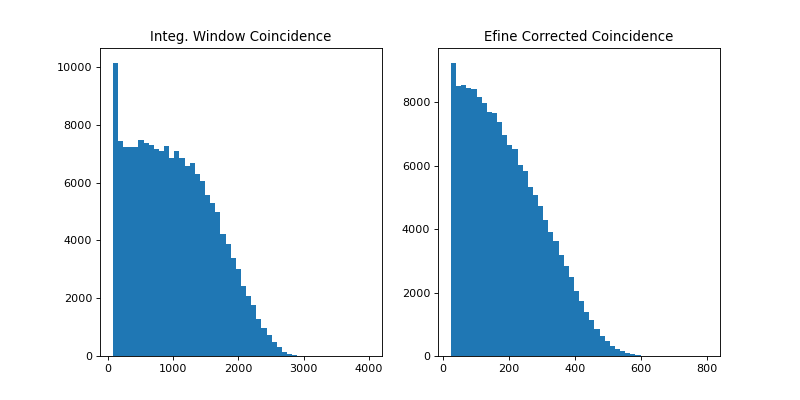

Text(0.5, 1.0, 'Efine Corrected Coincidence')

In [9]:
fig, axis = plt.subplots(1,2,figsize=(10,5))

#energy_array = energy_array[(energy_array>-100) & (energy_array<300)]


#coeff,coeff_err,chisq_r=TPcal.gauss_fit(energy_array_h,150,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
axis[0].hist(energy_window_array1,bins=50,range=[80,4000],log=False)
axis[1].hist(energy_efine_array1,bins=50,range=[25,800],log=False)
axis[0].set_title("Integ. Window Coincidence")
axis[1].set_title("Efine Corrected Coincidence")
#axis2 = fig.add_subplot(122)
#coeff,coeff_err,chisq_r=TPcal.gauss_fit(energy_array_f,150,True,axis2,'Gauss Fit','','',[0.65,0.5,"left"])


In [7]:
evt = hama_array[16]
evt2 = fbk_array[16]

fig, axis = plt.subplots(1,2,figsize=(10,4))

image=np.zeros((8,8))
for i in range(len(evt)):
    sipm = evt.iloc[i]['sensor_id']
    y = int(sipm // 10)-1
    x = int(sipm % 10)-1
    image[x,y] = evt.iloc[i]['intg_w']
axis[0].imshow(image)

image=np.zeros((8,8))
for i in range(len(evt2)):
    sipm = evt2.iloc[i]['sensor_id']
    y = int((sipm-100) // 10)-1
    x = int((sipm-100) % 10)-1
    image[x,y] = evt2.iloc[i]['intg_w']
axis[1].imshow(image)

NameError: name 'hama_array' is not defined